Some of the questions you could ask yourself are:
- Are there any problems with the data (null values, outliers, sufficient amount of data, etc.)?
- Is the chemical composition of red and white wines comparable?
- Does the chemical composition have any impact on the perceived quality of the wine?
- What are your observations?

# Import Libraries

In [24]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Overall look at the data
(Are there any problems with the data (null values, outliers, sufficient amount of data, etc.)?)
- read the data
- check if there are Null values
- check if there are missing values
- see if data is balanced (here or later?)

## Read the data

In [25]:
# read the data
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

## Inspect the data

In [26]:
# let's check the descriptive statistics
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Check for missing and null data

In [28]:
# check info
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [30]:
# check if there is no missing values
red_wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [31]:
white_wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [32]:
# we don't have any Null or missing values, so we're happy

# Data Cleaning
- find out if there is any duplicated data (and remove them)
- check the descriptive statistics
- look for outliers (what to do with them? how to spot them correctly?)

## Check for duplicates

In [33]:
# find out if there is any duplicated data
red_wine[red_wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [34]:
white_wine[white_wine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


In [35]:
# looks like there is a quite substantial amount of them

## Remove duplicates

In [36]:
# remove lines that have all values duplicated
red_wine.drop_duplicates(inplace=True)
white_wine.drop_duplicates(inplace=True)

## Inspect the data again

In [37]:
# let's check the descriptive statistics again
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Standardize the names

In [39]:
# use the rename method to change all columns names lowercase and add an underscore if they are made of 2 words
red_wine.rename(str.lower, axis='columns', inplace=True)  # make the names lowercase
red_wine.columns = red_wine.columns.str.replace(' ', '_')       # replace space with underscore in column names
red_wine

# use the rename method to change all columns names lowercase and add an underscore if they are made of 2 words
white_wine.rename(str.lower, axis='columns', inplace=True)  # make the names lowercase
white_wine.columns = white_wine.columns.str.replace(' ', '_')       # replace space with underscore in column names
white_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Adding quality categories to simplify the analysis

In [40]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

In [41]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

# Make a df with all wines

In [42]:
# create a df with all wines for later analysis

# add color of wine as parameter
red_wine['color'] = 'red'
white_wine['color'] = 'white'

# combine the wine dfs
wine = pd.concat([red_wine, white_wine])

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
wine['color'] = pd.Categorical(wine['color'],
categories=['red', 'white'])

# Slide: Introduce Dataset
1. Show that the data is unbalanced based on amount of red and white wine data (pie chart)
2. Since in this presentation I will mainly focus on Quality, let's have a look on how it is distributed. (bar charts)

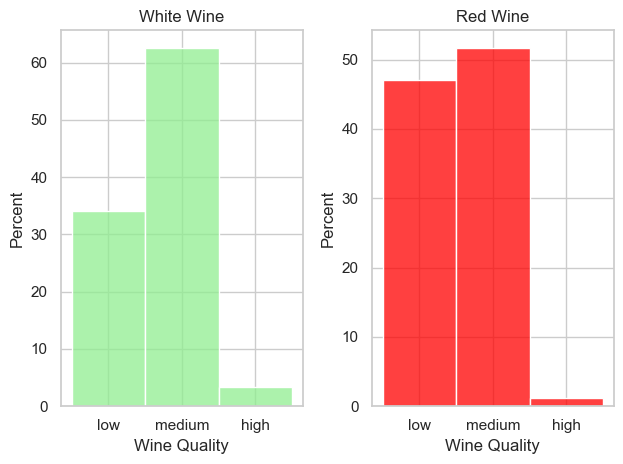

In [43]:
# since in this presentation I will mainly focus on quality, let's have a look on how it is distributed.

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure with two side-by-side histograms
fig, axes = plt.subplots(1, 2)

# plot the first histplot on the left (axes[0])
sns.histplot(data=white_wine, x='quality_label', color='lightgreen', stat='percent', ax=axes[0])
axes[0].set_title('White Wine')
axes[0].set_xlabel('Wine Quality')  # Set the x-axis label

# plot the second histplot on the right (axes[1])
sns.histplot(data=red_wine, x='quality_label', color='red', stat='percent', ax=axes[1])
axes[1].set_title('Red Wine')
axes[1].set_xlabel('Wine Quality')  # Set the x-axis label

# adjust layout is used to adjust the layout so that the plots don't overlap
plt.tight_layout()

# show the plot
plt.show()

In [44]:
# we can see, that unfortunately the wine produced is of rather medium or low quality and there is a lot of space to expand into the high quality category

# Exploratory Data Analysis  

(Is the chemical composition of red and white wines comparable?)  
(Does the chemical composition have any impact on the perceived quality of the wine?)

What chemical composition does our perfect wine have?

What should we pay attention to, when making good quality wine?

## Is the chemical composition of red and white wines comparable?

The dataset is unbalanced, there is significantly more data about white, than red wine (as shown below). Can we even analyze them together?  
Let's compare the distributions of chemical properties between them to find out.

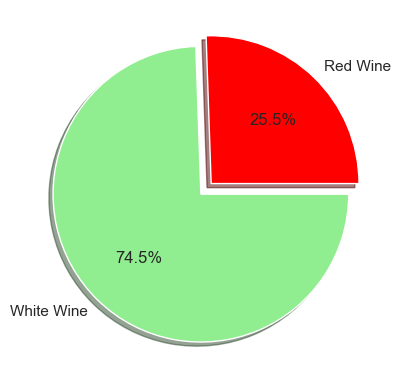

In [45]:
# create a figure and axis
fig1, ax1 = plt.subplots()

# data for the pie chart (based on the amount of entries per wine data set)
data = [red_wine.shape[0], white_wine.shape[0]]

# labels for each section of the pie chart
labels=['Red Wine', 'White Wine']

# colors for each type of wine
colors = ['red', 'lightgreen']

# plot the pie chart (also show % using autopct, add a shadow and explode for aesthetics)
ax1.pie(data, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, explode=(0.1, 0))

# show the plot
plt.show()

### Visualize the Chemical Composition
compare the distributions of chemical properties between red and white wines

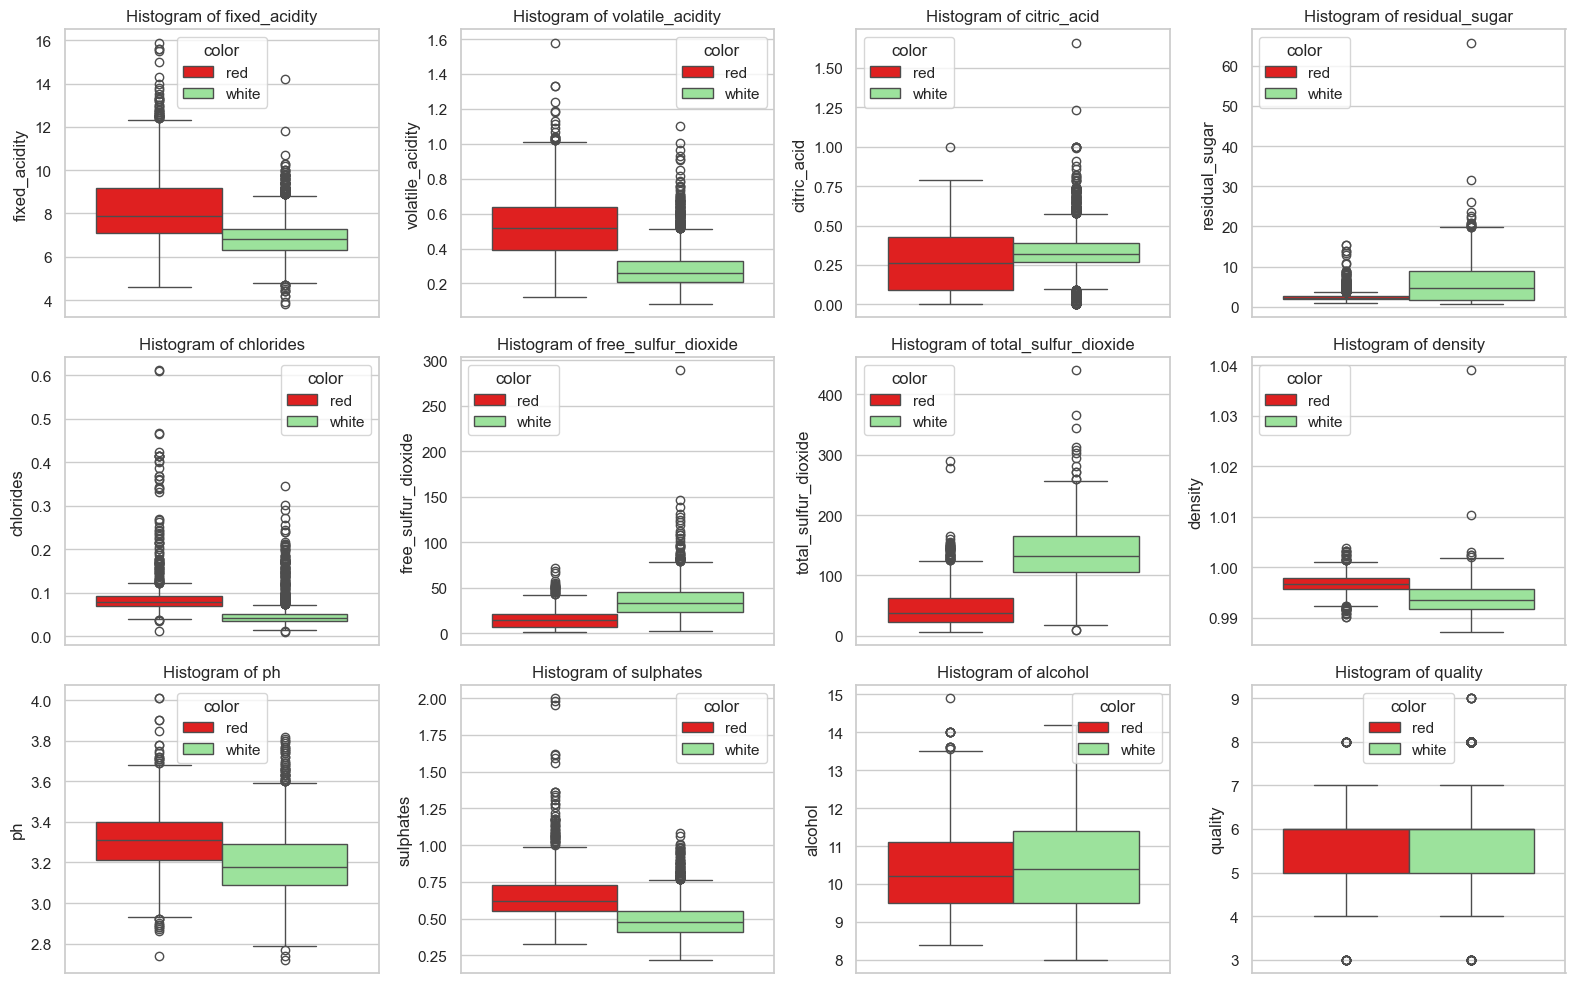

In [46]:
# Visualize the Chemical Composition
# compare the distributions of chemical properties between red and white wines
# box plots are a useful tool for this comparison

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure with a grid of histograms
plt.figure(figsize=(16, 10))

# loop through the columns for which you want histograms
for i, parameter in enumerate(wine.describe().columns):

    # create subplots
    plt.subplot(3, 4, i + 1)  # Adjust the subplot parameters based on your DataFrame size

    # create a custom color palette with red and light green
    custom_palette = sns.color_palette(["red", "lightgreen"])

    # plot the histogram for the current column with hue
    sns.boxplot(data=wine, y=parameter, hue='color', palette=custom_palette)

    # set titles and labels
    plt.title(f'Histogram of {parameter}')
    plt.ylabel(parameter)

# adjust layout
plt.tight_layout()

# show the plot
plt.show()


Visually we can see, that the average values for the chemical properties of the two different wine types rarely overlap.
Let's additionaly perform a statistical tests to determine if there are significant differences between the chemical compositions of red and white wines, to confirm what we can see above.

In [47]:
# Statistical Testing
# perform statistical tests to determine if there are significant differences between the chemical compositions of red and white wines
# a t-test is commonly used for this purpose

for parameter in white_wine.describe().columns:

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(red_wine[parameter], white_wine[parameter])

    # Check the p-value
    print(f'P-Value for {parameter}: {p_value:.5f}')


P-Value for fixed_acidity: 0.00000
P-Value for volatile_acidity: 0.00000
P-Value for citric_acid: 0.00000
P-Value for residual_sugar: 0.00000
P-Value for chlorides: 0.00000
P-Value for free_sulfur_dioxide: 0.00000
P-Value for total_sulfur_dioxide: 0.00000
P-Value for density: 0.00000
P-Value for ph: 0.00000
P-Value for sulphates: 0.00000
P-Value for alcohol: 0.00002
P-Value for quality: 0.00000


we can confidently conclude that red and white wine differ significantly in their chemical composition and even perceived quality

## Does the chemical composition have any impact on the perceived quality of the wine?

In [48]:
# to find out, let's analyze the correlation of the parameters of the chemical composition and quality
# since red and white wine differ quite strong in composition, we should check their correlations seprately

def generate_corr_matrix(wine_df : pd.DataFrame):

    # select columns that can be used for correlation matrix
    # describe() will give us all columns with numeric values and keys() the name of those columns
    numeric_values = list(wine_df.describe().keys())

    # calculate the correlation matrix
    wine_corr = wine_df[numeric_values].corr()

    return wine_corr

red_wine_corr = generate_corr_matrix(red_wine)

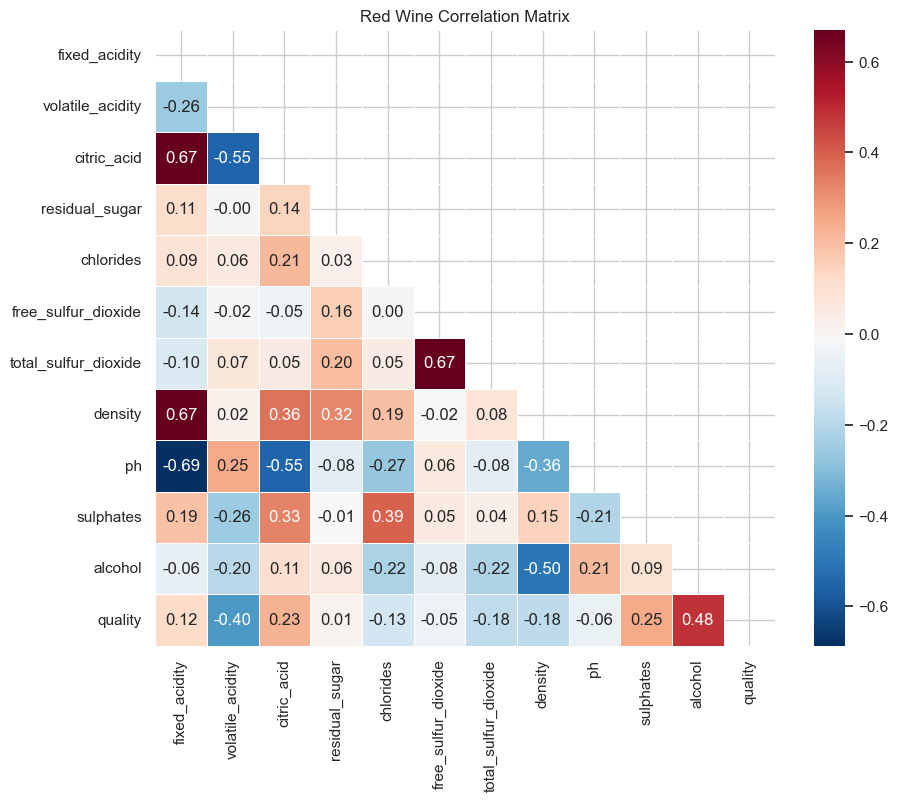

In [49]:
# let's make the data more readable, by adding some color putting it in a heatmap

def create_heatmap(wine_corr, title):

    # create a heatmap
    plt.figure(figsize=(10, 8))

    # create a mask to exclude the diagonal and everything above it
    mask = np.triu(np.ones_like(wine_corr))

    sns.heatmap(wine_corr, annot=True, cmap='RdBu_r', fmt=".2f", linewidth=.5, mask=mask)

    # set plot title
    plt.title(title)

    # show the plot
    plt.show()

create_heatmap(generate_corr_matrix(red_wine), 'Red Wine Correlation Matrix')

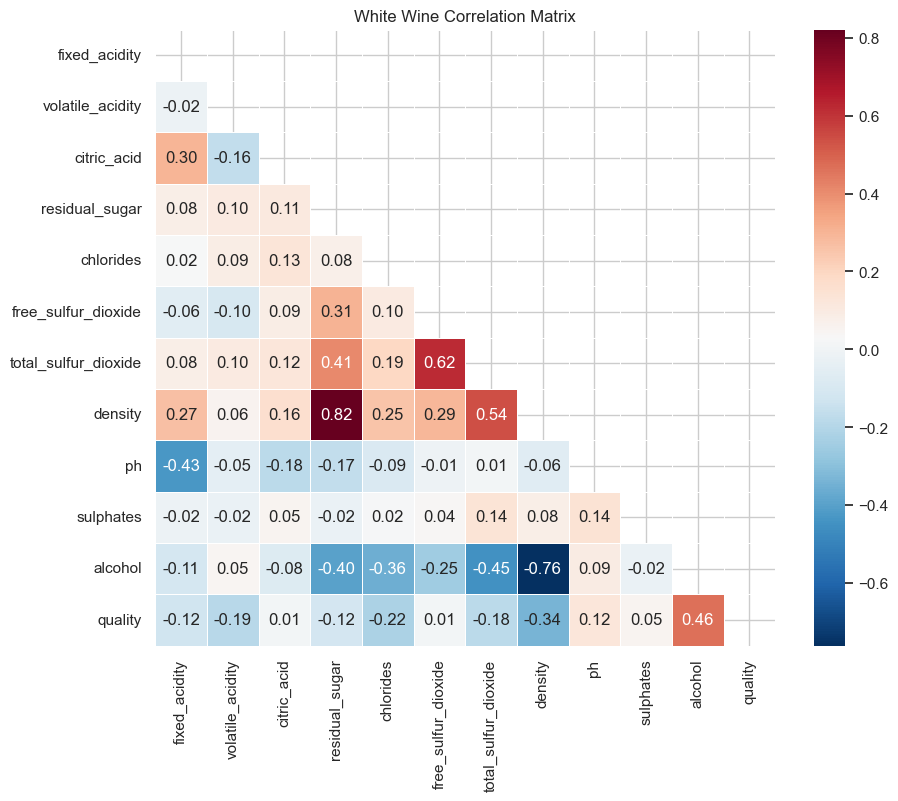

In [50]:
# same for white wine

create_heatmap(generate_corr_matrix(white_wine), 'White Wine Correlation Matrix')

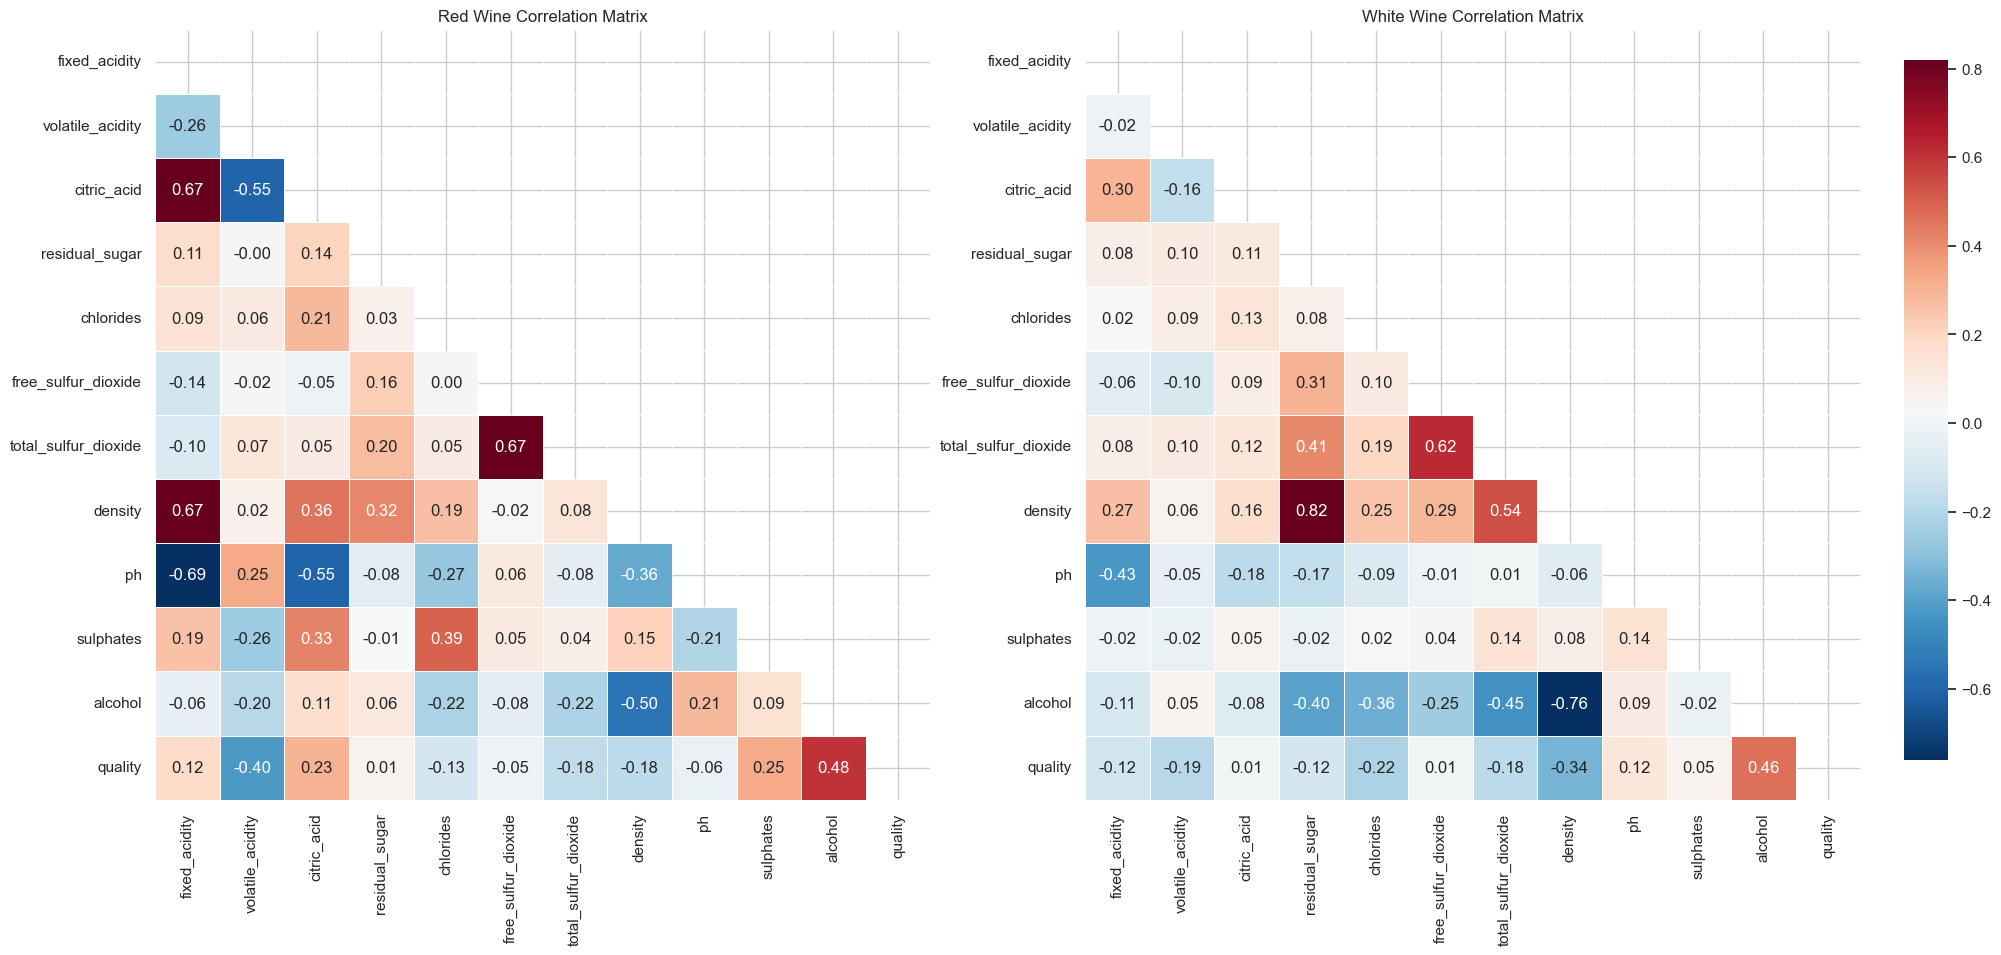

In [51]:
# let's show them both in one figure

# create a figure with two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# adjust the position of the colorbar
cbar_ax = fig.add_axes([.92, 0.15, 0.02, 0.7])

# create a mask to exclude the diagonal and everything above it
mask = np.triu(np.ones_like(generate_corr_matrix(red_wine)))

# plot the first heatmaps
sns.heatmap(generate_corr_matrix(red_wine), annot=True, cmap='RdBu_r', fmt=".2f", linewidth=.5, mask=mask, ax=axes[0], cbar_ax=cbar_ax)
sns.heatmap(generate_corr_matrix(white_wine), annot=True, cmap='RdBu_r', fmt=".2f", linewidth=.5, mask=mask, ax=axes[1], cbar_ax=cbar_ax)

# set plot title
axes[0].set_title('Red Wine Correlation Matrix')
axes[1].set_title('White Wine Correlation Matrix')

# show the plot
plt.show()

In [52]:
# in the heatmaps above we can focus on the last row to see how strong the single chemical properties are correlated to quality

In [53]:
# let's also check the single parameters and what can increase or decrease the quality

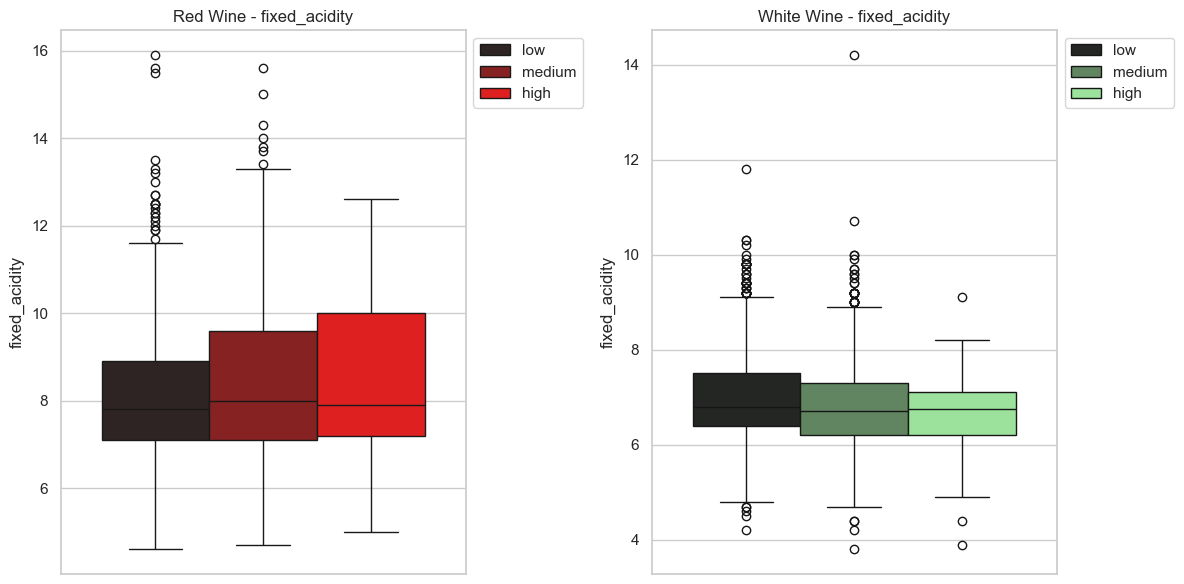

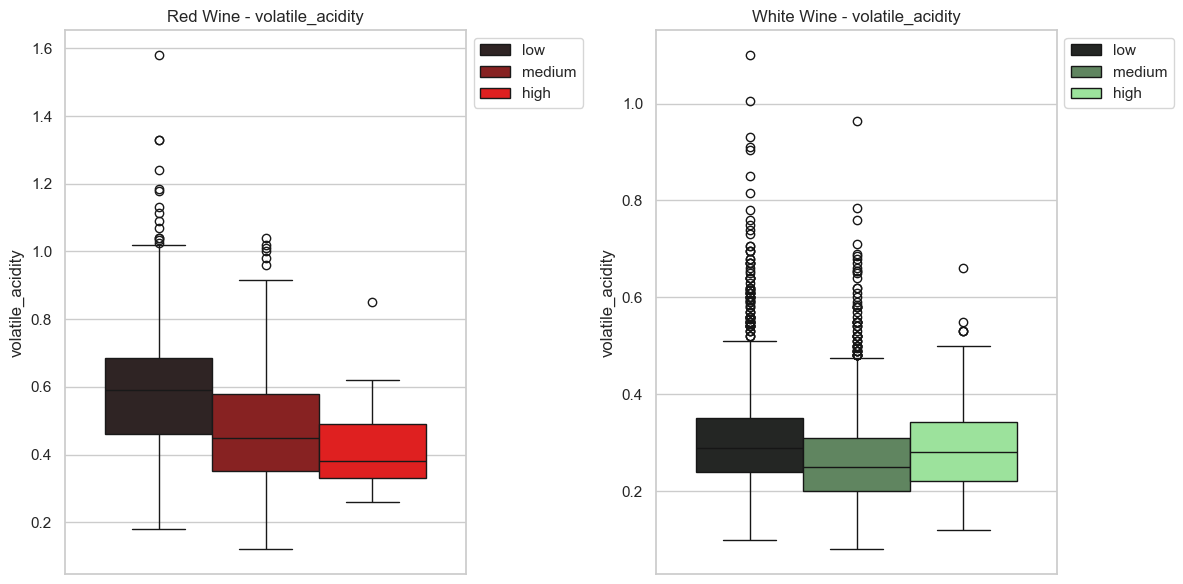

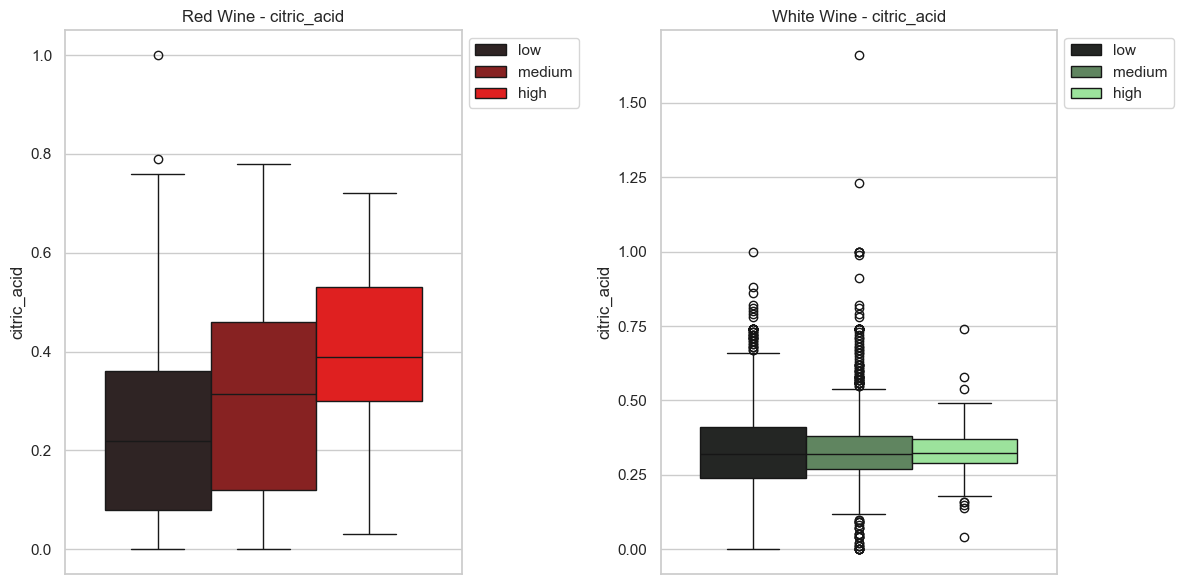

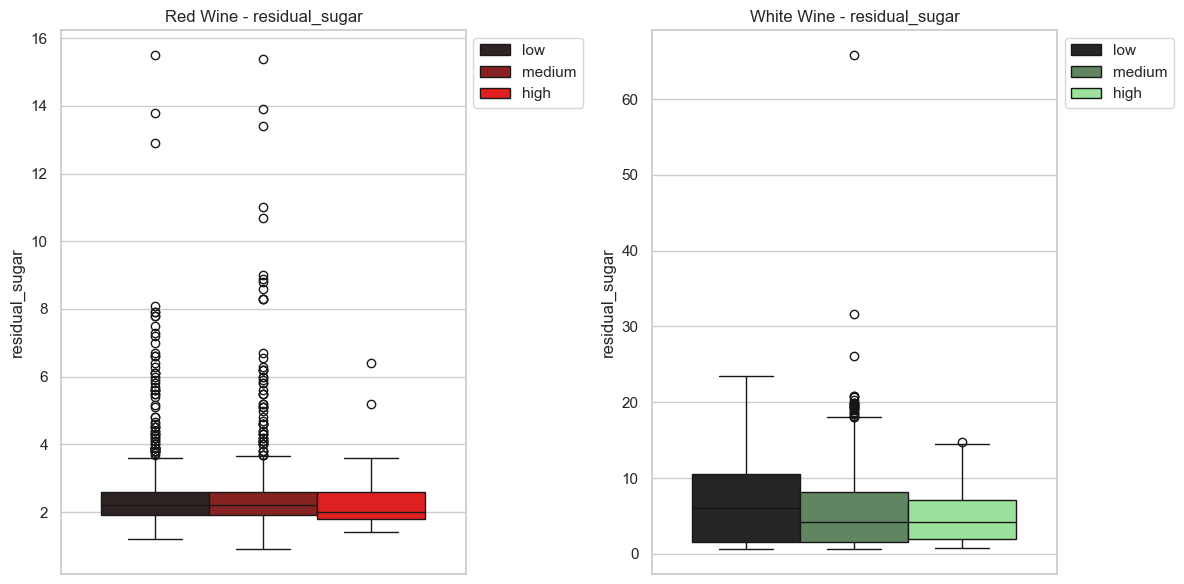

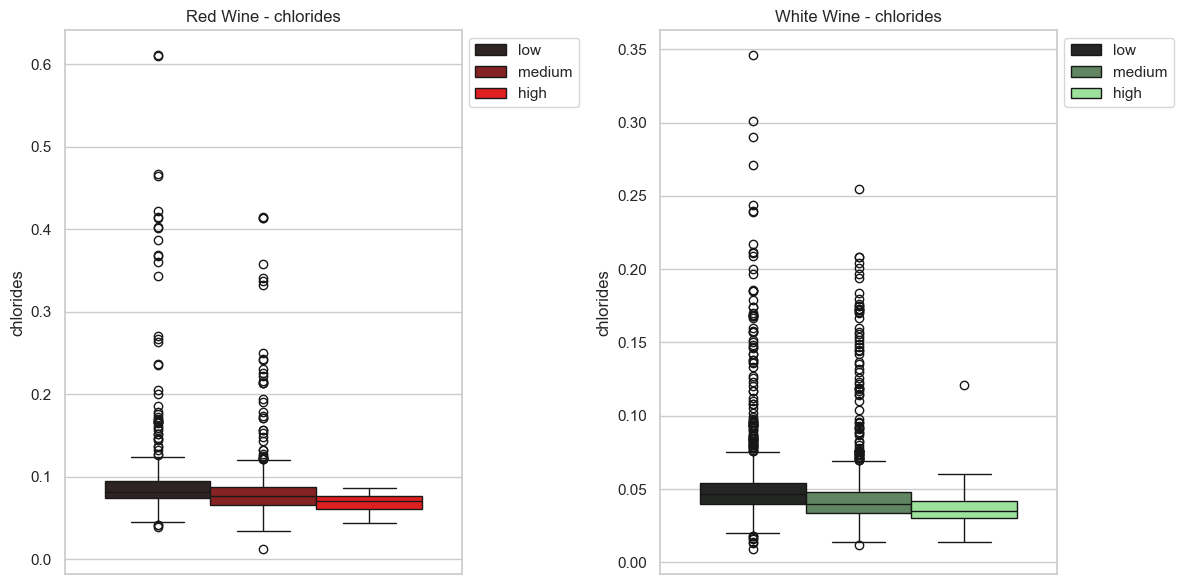

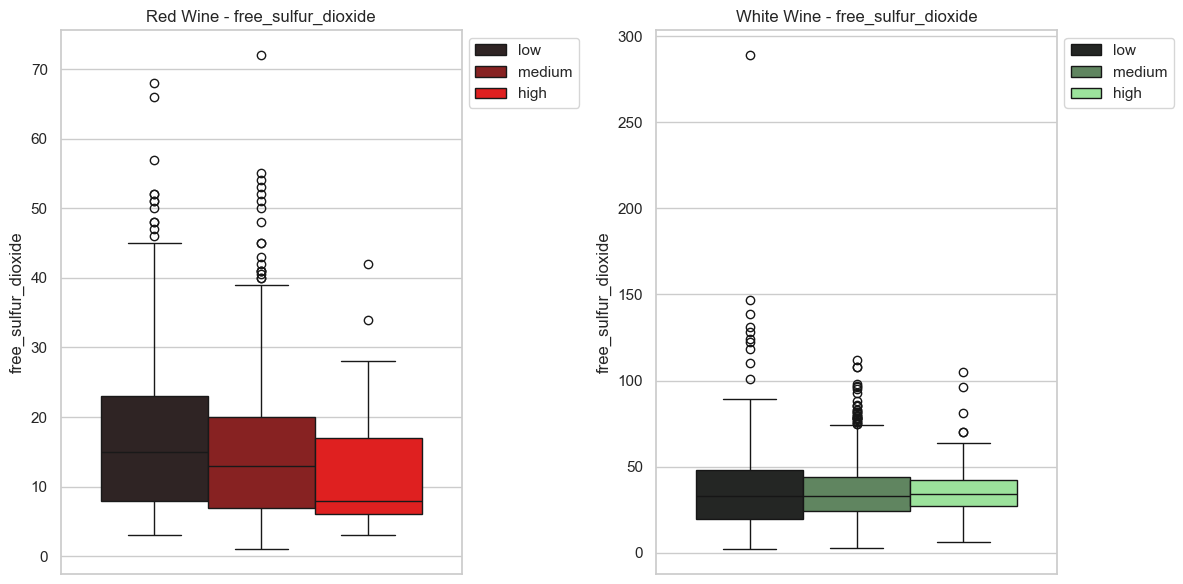

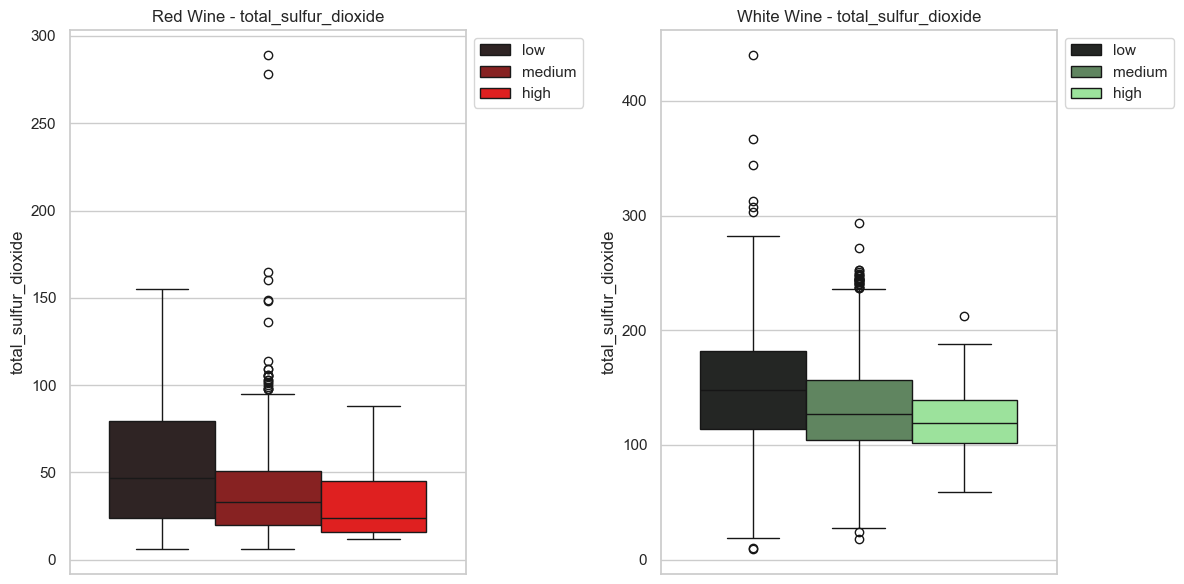

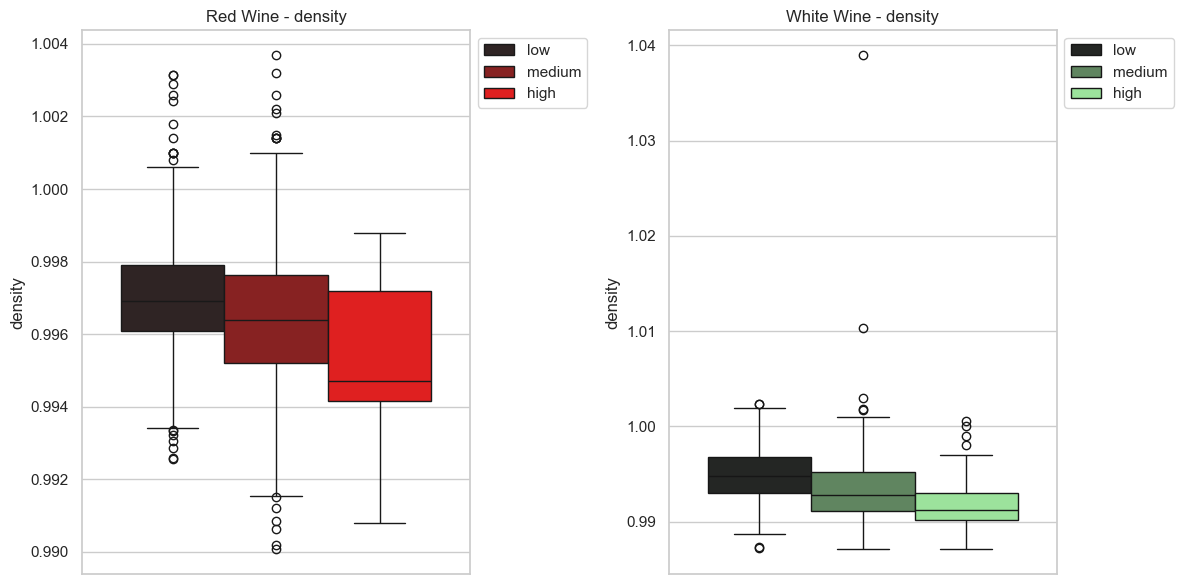

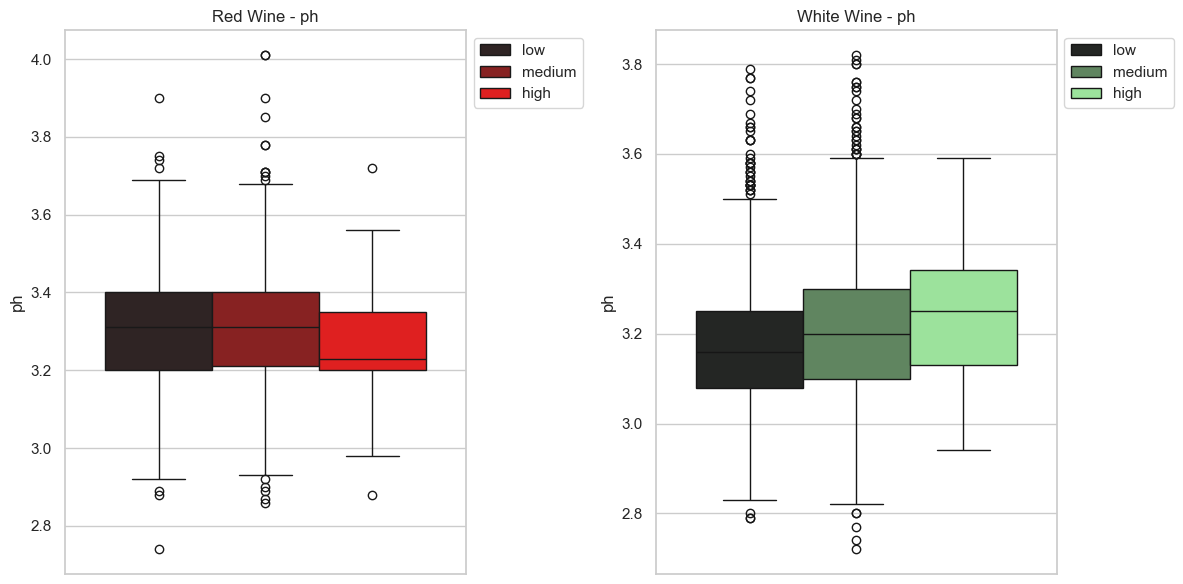

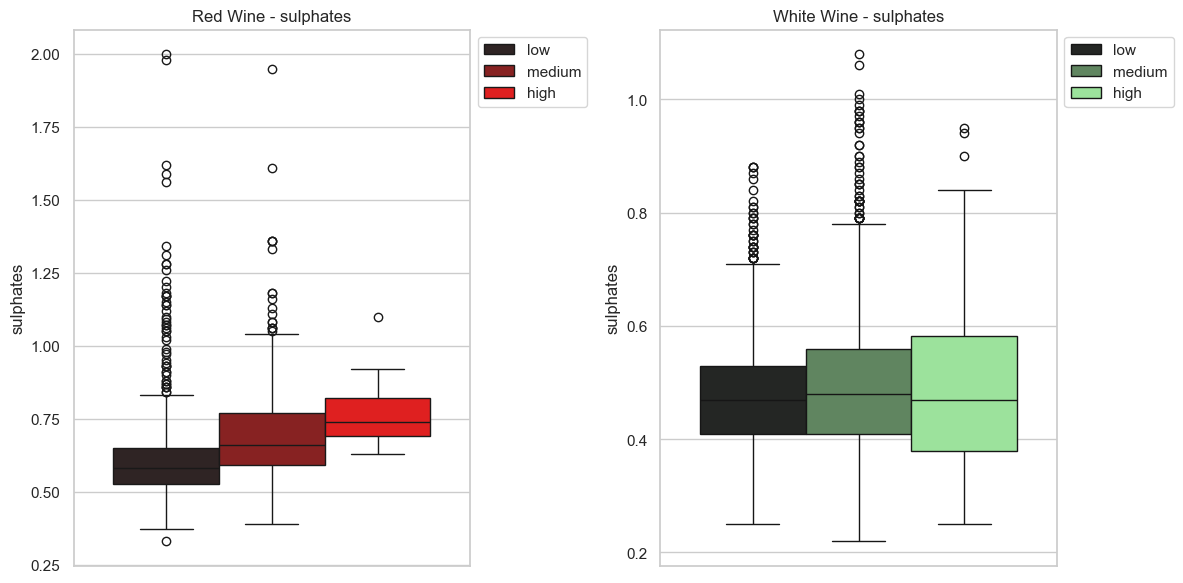

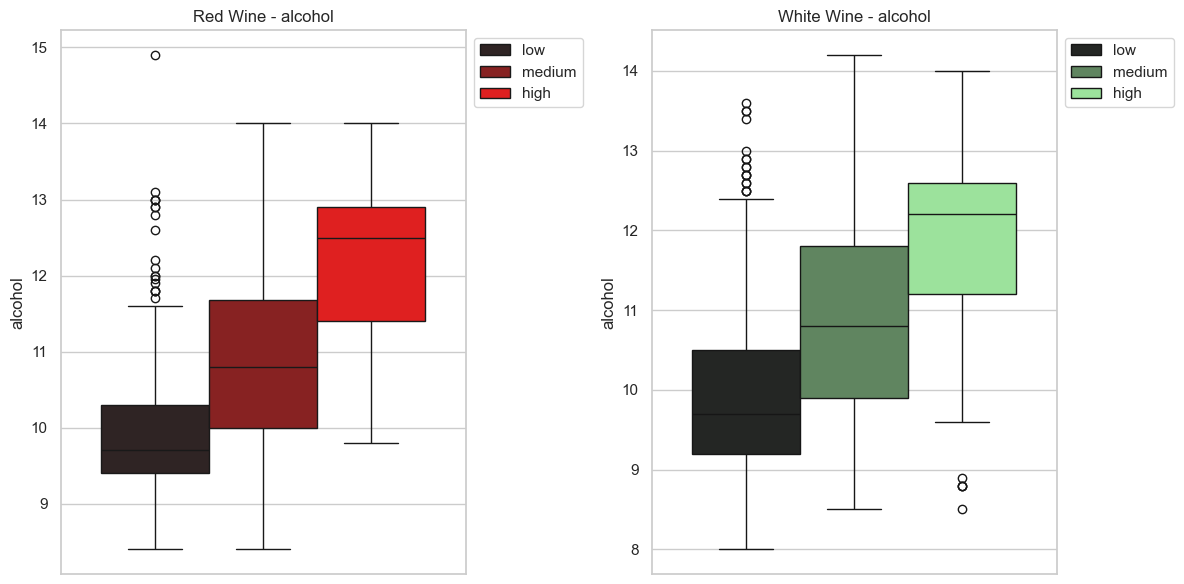

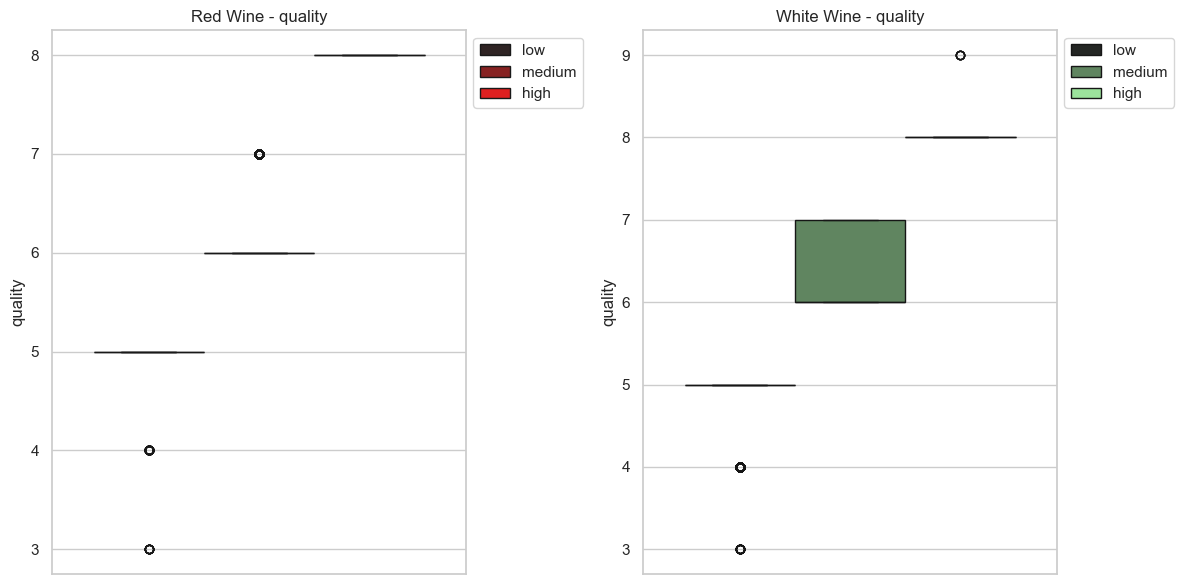

In [54]:
# make boxplots - divide using quality labels

# loop through the parameters
for parameter in white_wine.describe().columns:

    # set the style of seaborn
    sns.set(style="whitegrid")

    # create a figure with two side-by-side boxplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.boxplot(data=red_wine, y=parameter, hue='quality_label', palette='dark:red', ax=axes[0])
    sns.boxplot(data=white_wine, y=parameter, hue='quality_label', palette='dark:lightgreen', ax=axes[1])

    # set the title
    axes[0].set_title(f'Red Wine - {parameter}')
    axes[1].set_title(f'White Wine - {parameter}')

    # move the legend to the upper left
    axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
    axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

    # adjust layout is used to adjust the layout so that the plots don't overlap
    plt.tight_layout()

    # show the plot
    plt.show()

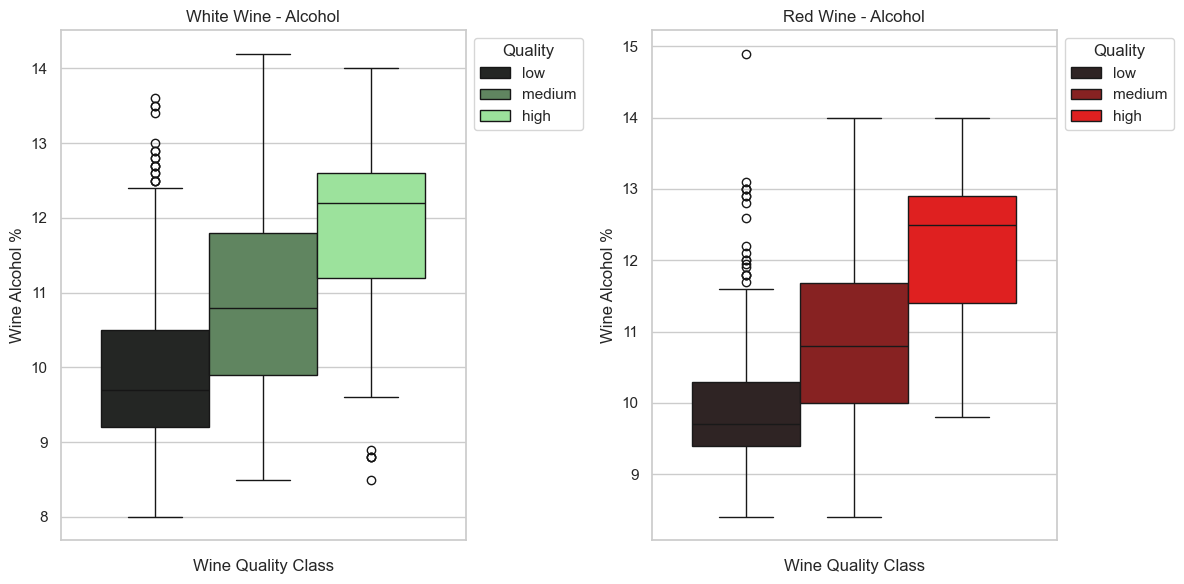

In [55]:
# just show alcohol

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure with two side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=white_wine, y='alcohol', hue='quality_label', palette='dark:lightgreen', ax=axes[0])
sns.boxplot(data=red_wine, y='alcohol', hue='quality_label', palette='dark:red', ax=axes[1])

# set the title
axes[0].set_title(f'White Wine - Alcohol')
axes[1].set_title(f'Red Wine - Alcohol')

# set labels
axes[0].set(xlabel='Wine Quality Class', ylabel='Wine Alcohol %')
axes[1].set(xlabel='Wine Quality Class', ylabel='Wine Alcohol %')

# move the legend to the upper left
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Quality')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Quality')

# adjust layout is used to adjust the layout so that the plots don't overlap
plt.tight_layout()

# show the plot
plt.show()

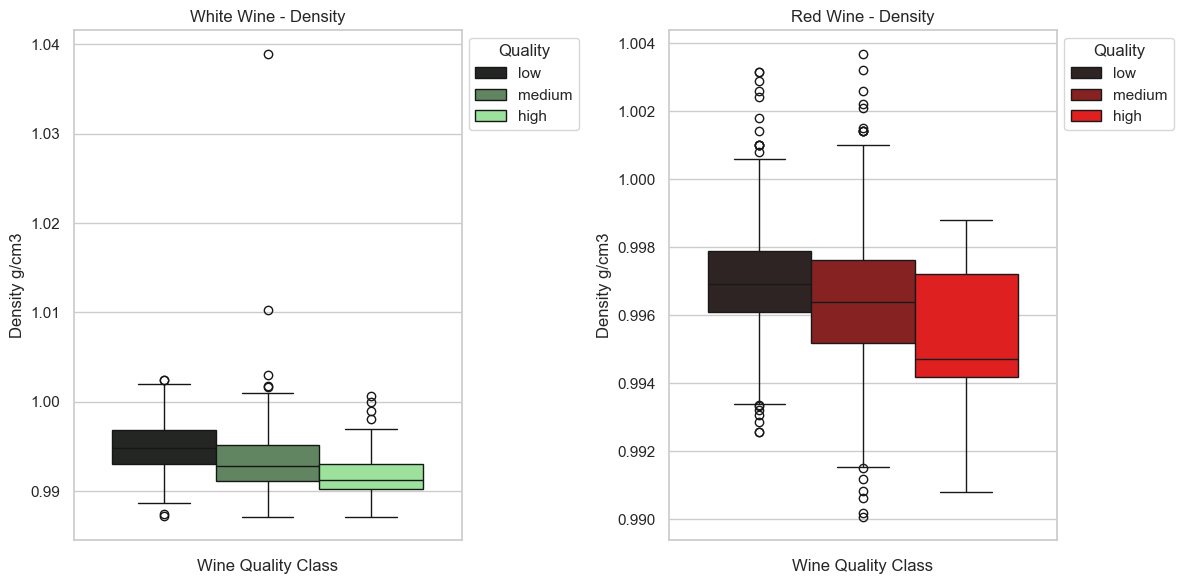

In [56]:
# just show density

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure with two side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=white_wine, y='density', hue='quality_label', palette='dark:lightgreen', ax=axes[0])
sns.boxplot(data=red_wine, y='density', hue='quality_label', palette='dark:red', ax=axes[1])

# set the title
axes[0].set_title(f'White Wine - Density')
axes[1].set_title(f'Red Wine - Density')

# set labels
axes[0].set(xlabel='Wine Quality Class', ylabel='Density g/cm3')
axes[1].set(xlabel='Wine Quality Class', ylabel='Density g/cm3')

# move the legend to the upper left
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Quality')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Quality')

# adjust layout is used to adjust the layout so that the plots don't overlap
plt.tight_layout()

# show the plot
plt.show()

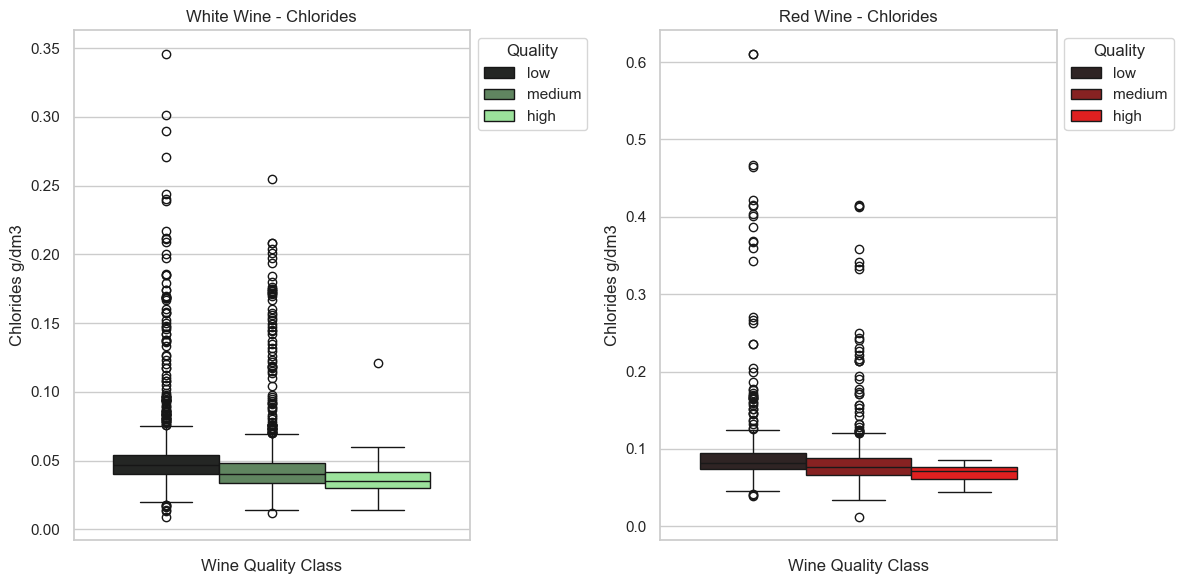

In [57]:
# just show chlorides

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure with two side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=white_wine, y='chlorides', hue='quality_label', palette='dark:lightgreen', ax=axes[0])
sns.boxplot(data=red_wine, y='chlorides', hue='quality_label', palette='dark:red', ax=axes[1])

# set the title
axes[0].set_title(f'White Wine - Chlorides')
axes[1].set_title(f'Red Wine - Chlorides')

# set labels
axes[0].set(xlabel='Wine Quality Class', ylabel='Chlorides g/dm3')
axes[1].set(xlabel='Wine Quality Class', ylabel='Chlorides g/dm3')

# move the legend to the upper left
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Quality')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Quality')

# adjust layout is used to adjust the layout so that the plots don't overlap
plt.tight_layout()

# show the plot
plt.show()

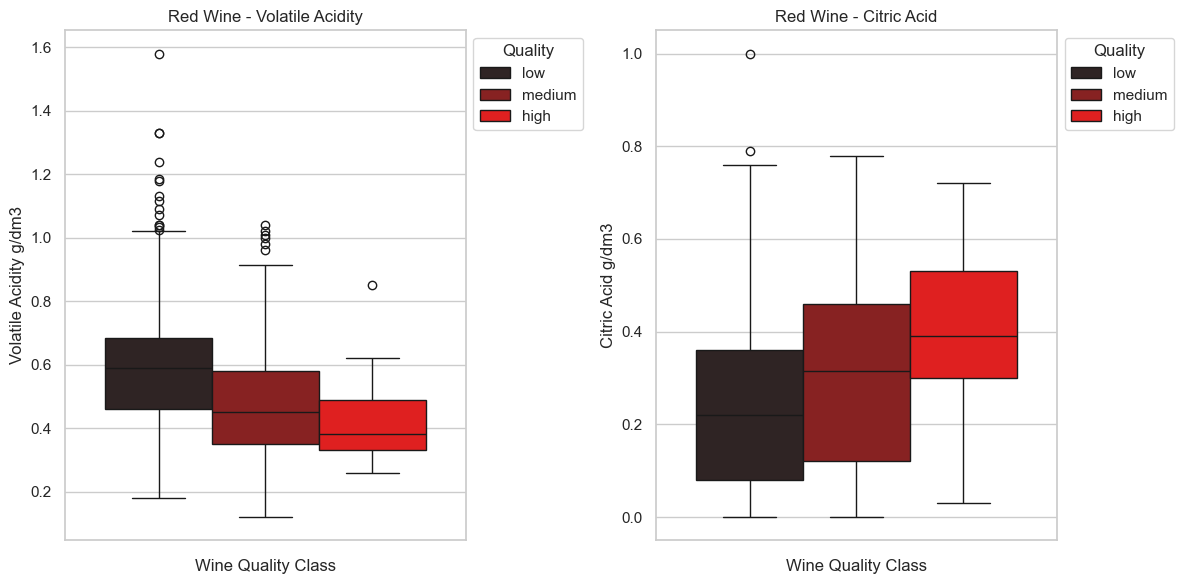

In [59]:

# just show acidities for red wine, since they have a high correlation to quality

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure with two side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=red_wine, y='volatile_acidity', hue='quality_label', palette='dark:red', ax=axes[0])
sns.boxplot(data=red_wine, y='citric_acid', hue='quality_label', palette='dark:red', ax=axes[1])

# set the title
axes[0].set_title(f'Red Wine - Volatile Acidity')
axes[1].set_title(f'Red Wine - Citric Acid')

# set labels
axes[0].set(xlabel='Wine Quality Class', ylabel='Volatile Acidity g/dm3')
axes[1].set(xlabel='Wine Quality Class', ylabel='Citric Acid g/dm3')

# move the legend to the upper left
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Quality')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Quality')

# adjust layout is used to adjust the layout so that the plots don't overlap
plt.tight_layout()

# show the plot
plt.show()

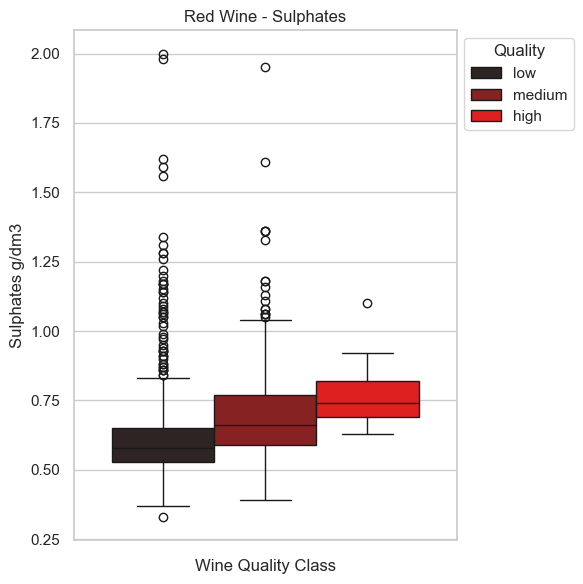

In [ ]:

# just show sulphates for red wine, since they have a high correlation to quality

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure with two side-by-side boxplots
plt.subplots(1, 1, figsize=(6, 6))

sns.boxplot(data=red_wine, y='sulphates', hue='quality_label', palette='dark:red')

# set the title
plt.title(f'Red Wine - Sulphates')

# set labels
plt.xlabel('Wine Quality Class')
plt.ylabel('Sulphates g/dm3')

# move the legend to the upper left
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Quality')

# adjust layout is used to adjust the layout so that the plots don't overlap
plt.tight_layout()

# show the plot
plt.show()

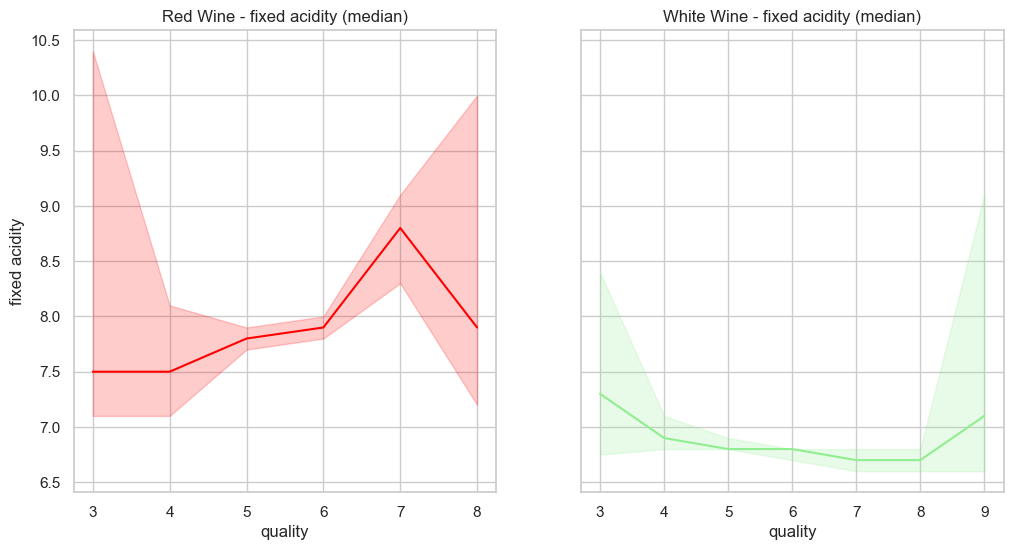

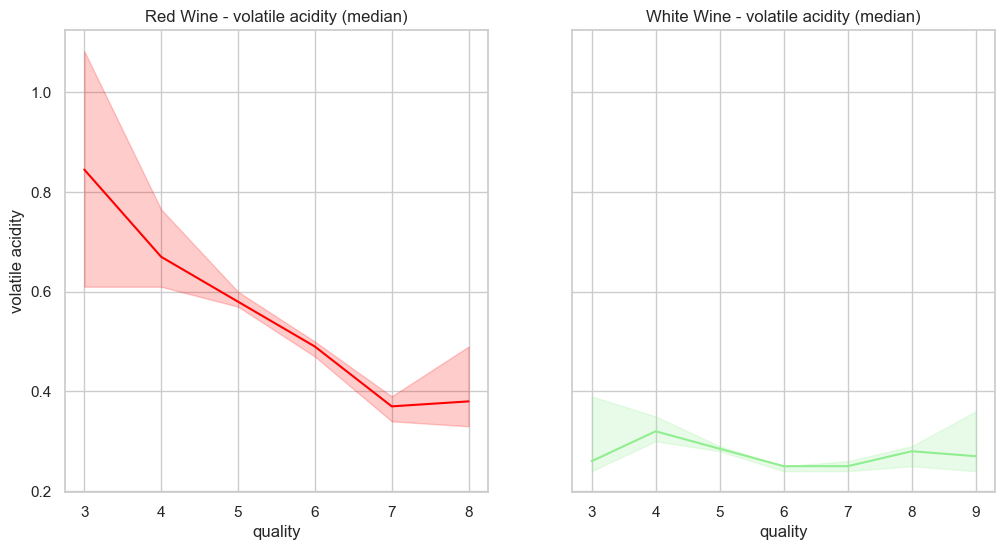

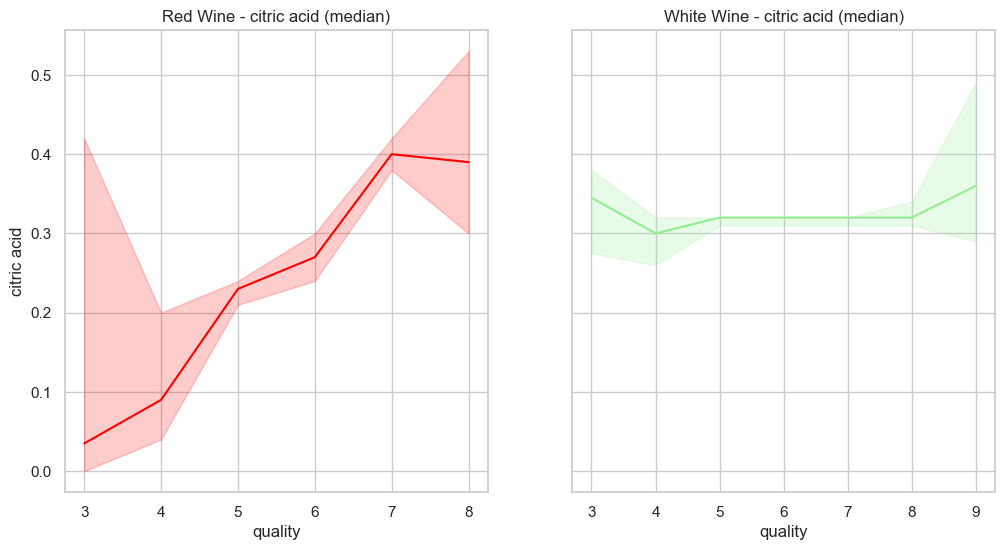

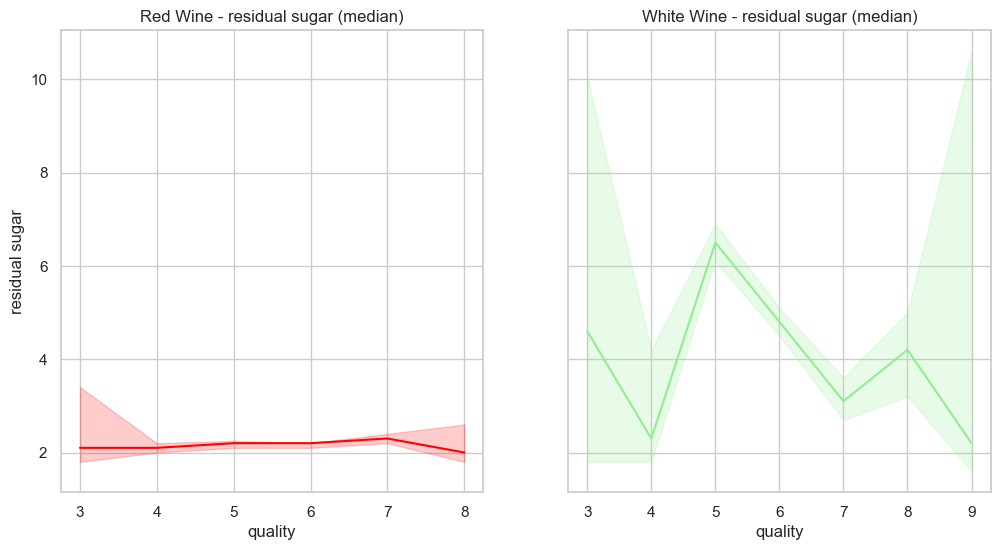

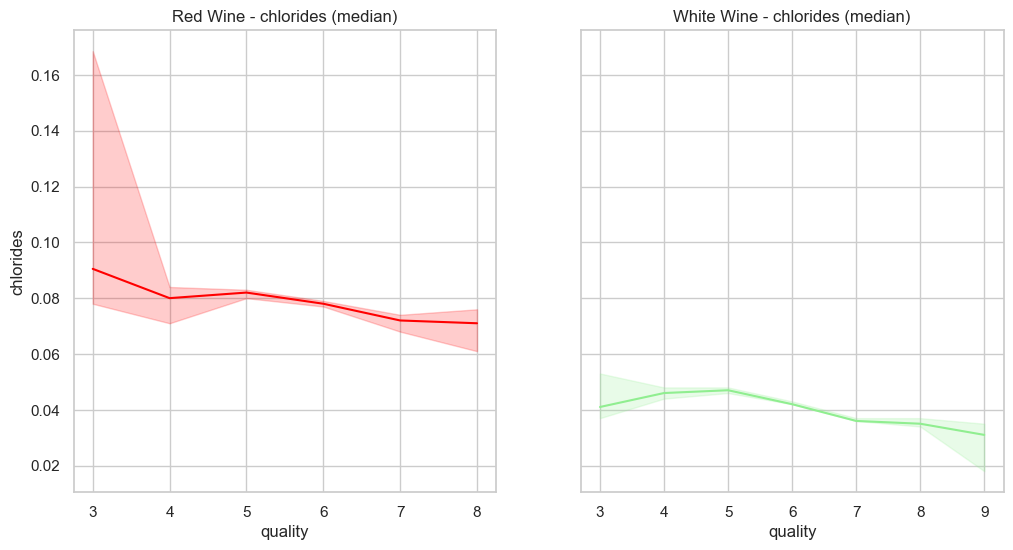

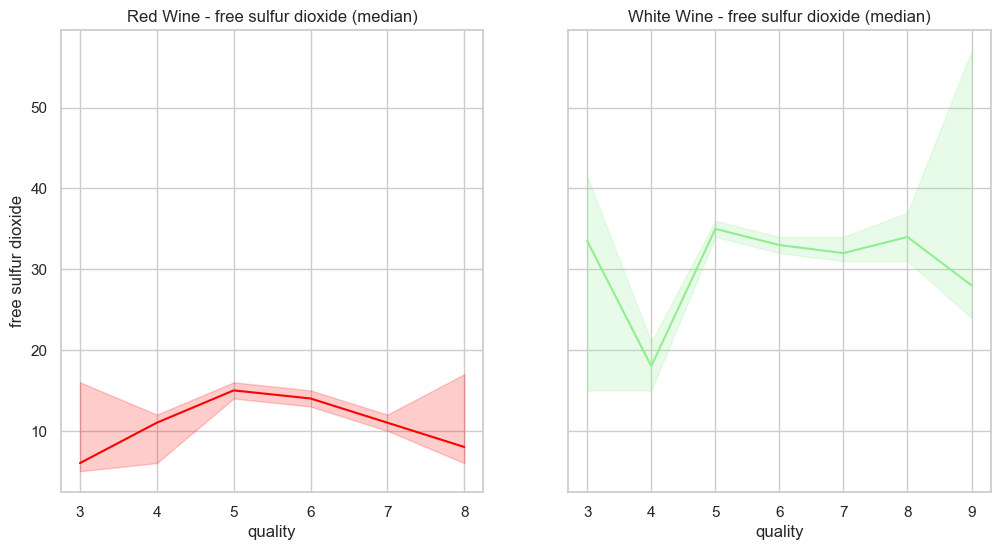

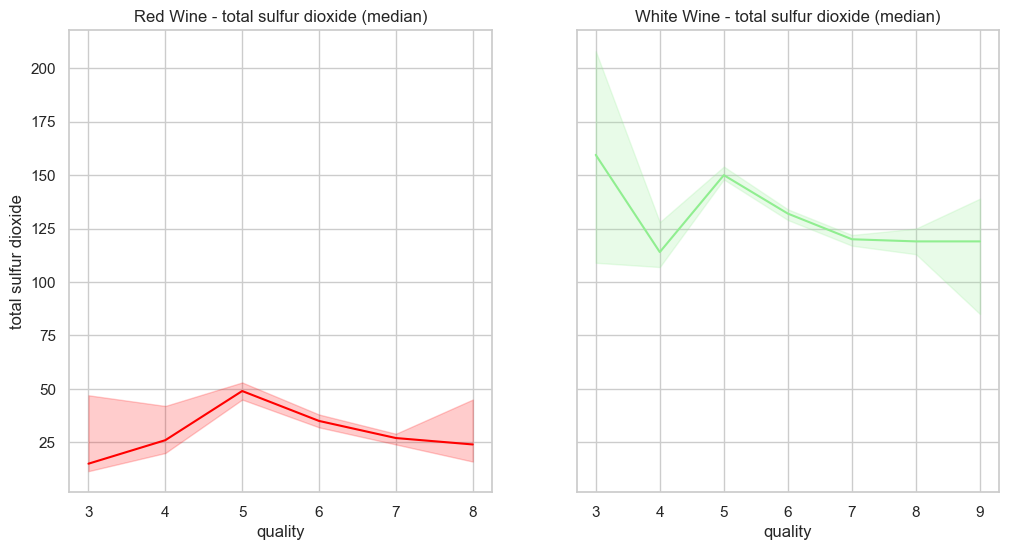

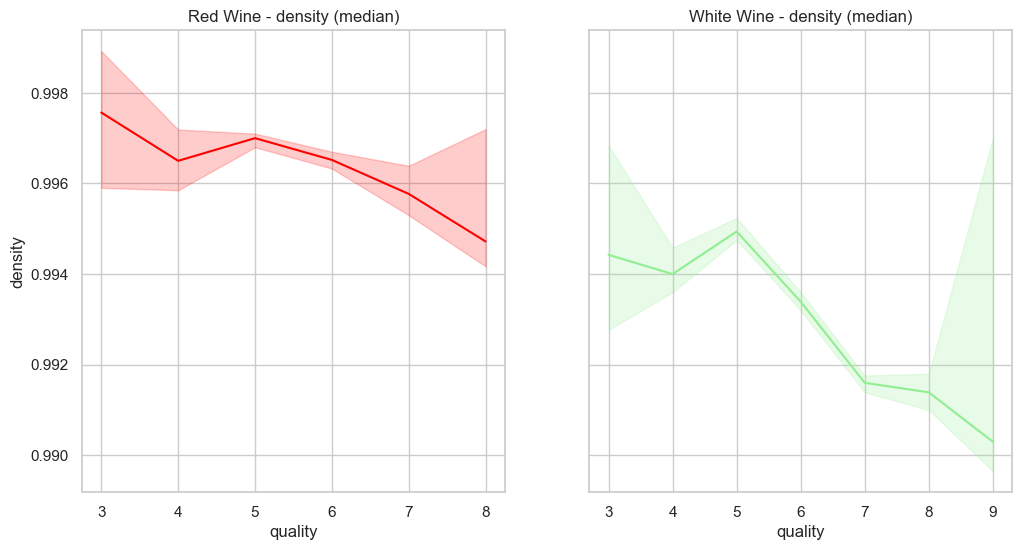

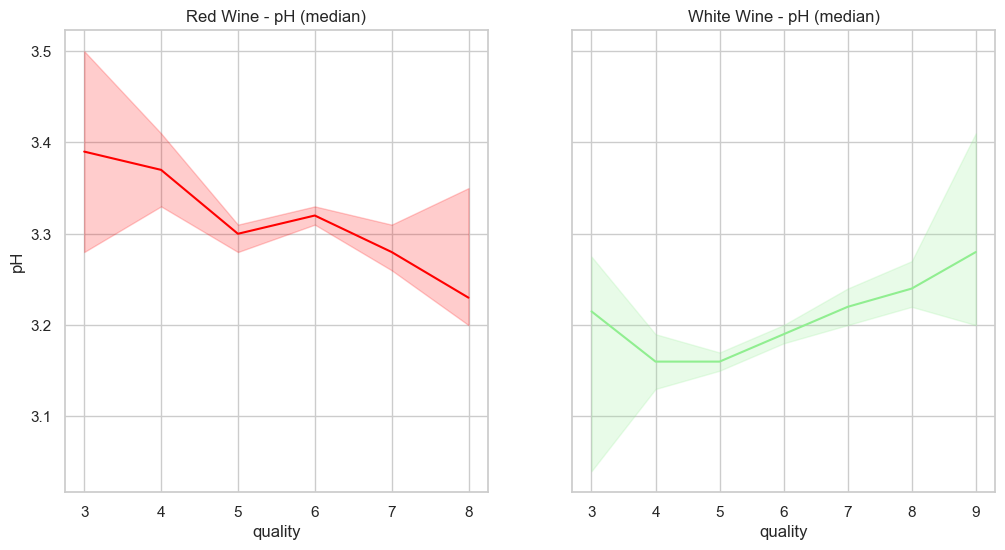

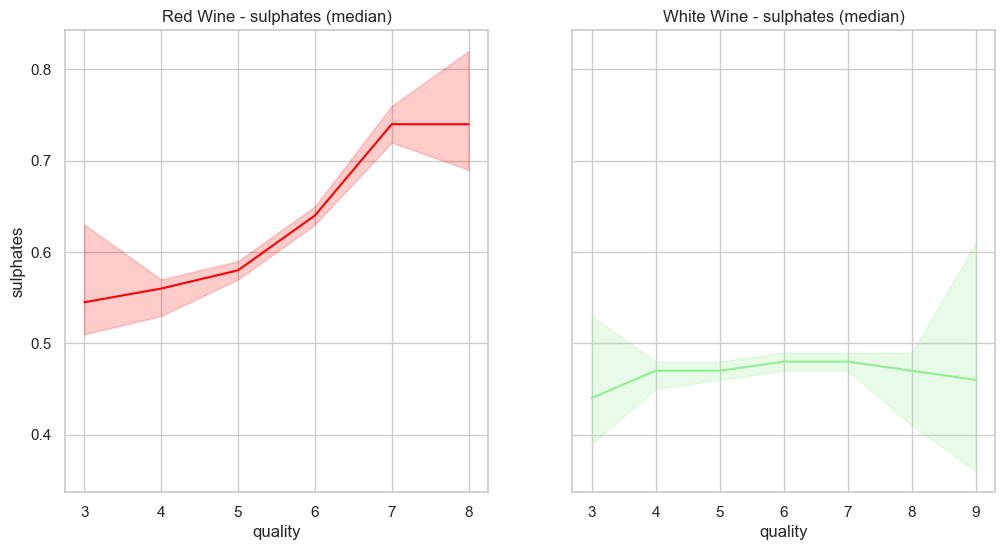

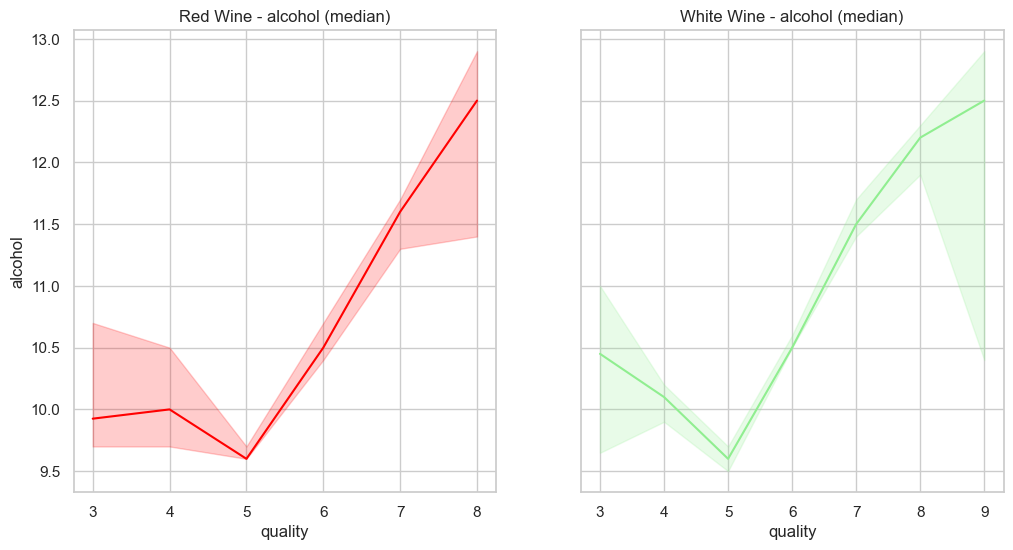

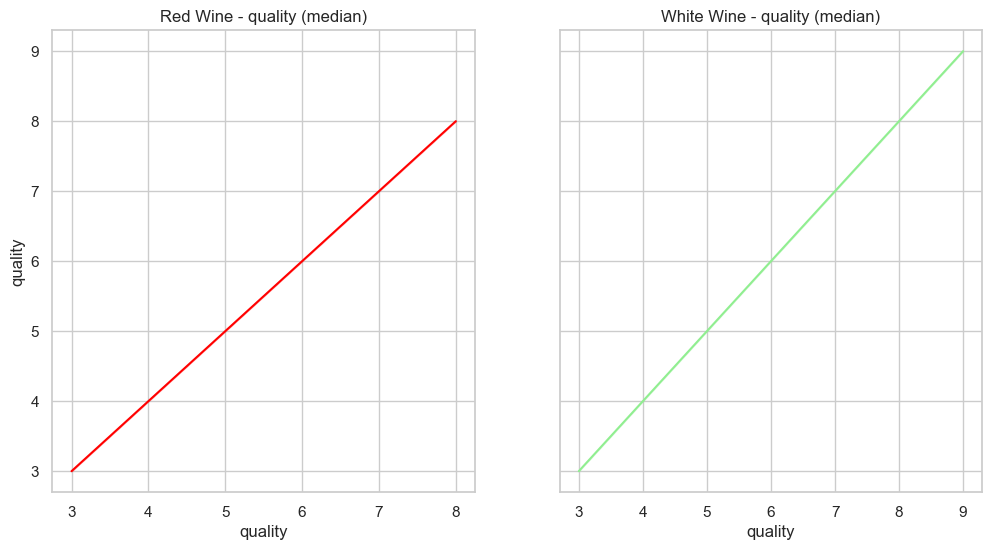

In [ ]:
# loop through the parameters
for parameter in white_wine.describe().columns:

    # set the style of seaborn
    sns.set(style="whitegrid")

    # create a figure with two side-by-side boxplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    sns.lineplot(data=red_wine, y=parameter, x='quality', color='red', ax=axes[0], estimator='median')
    sns.lineplot(data=white_wine, y=parameter, x='quality', color='lightgreen', ax=axes[1], estimator='median')

    # set the title
    axes[0].set_title(f'Red Wine - {parameter} (median)')
    axes[1].set_title(f'White Wine - {parameter} (median)')

    # show the plot
    plt.show()

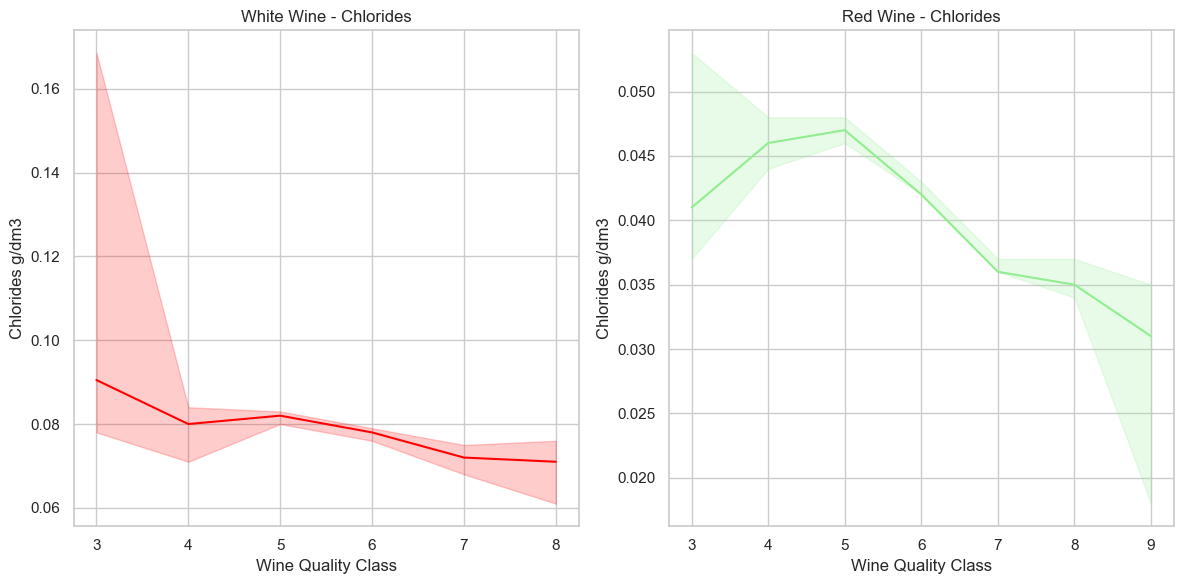

In [ ]:
# just show chlorides lineplot

# set the style of seaborn
sns.set(style="whitegrid")

# create a figure with two side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(data=red_wine, y='chlorides', x='quality', color='red', ax=axes[0], estimator='median')
sns.lineplot(data=white_wine, y='chlorides', x='quality', color='lightgreen', ax=axes[1], estimator='median')

# set the title
axes[0].set_title(f'White Wine - Chlorides')
axes[1].set_title(f'Red Wine - Chlorides')

# set labels
axes[0].set(xlabel='Wine Quality Class', ylabel='Chlorides g/dm3')
axes[1].set(xlabel='Wine Quality Class', ylabel='Chlorides g/dm3')

# adjust layout is used to adjust the layout so that the plots don't overlap
plt.tight_layout()

# show the plot
plt.show()

In [ ]:
# let's just check all the features and divide them in ones that are relevant and ones that aren't based on the p value

# RED WINE

def anova_test(df): 
    results = {}
    for feature in red_wine.describe().columns:
        F, p = stats.f_oneway(
            df[df['quality_label'] == 'low'][feature],
            df[df['quality_label'] == 'medium'][feature],
            df[df['quality_label'] == 'high'][feature])
        results[feature] = p    
    return results


def anova_printer(anova_results, threshold = 0.05):
    print('RELEVANT:')
    for result in anova_results:
        if anova_results[result] < threshold:
            print(result)

    print()
    print('IRRELEVANT:')
    for result in anova_results:
        if anova_results[result] > threshold:
            print(result)

anova_printer(anova_test(red_wine))



RELEVANT:
fixed acidity
volatile acidity
citric acid
chlorides
free sulfur dioxide
total sulfur dioxide
density
sulphates
alcohol
quality

IRRELEVANT:
residual sugar
pH


In [ ]:
# WHITE WINE

anova_printer(anova_test(white_wine))

RELEVANT:
fixed acidity
volatile acidity
residual sugar
chlorides
total sulfur dioxide
density
pH
sulphates
alcohol
quality

IRRELEVANT:
citric acid
free sulfur dioxide


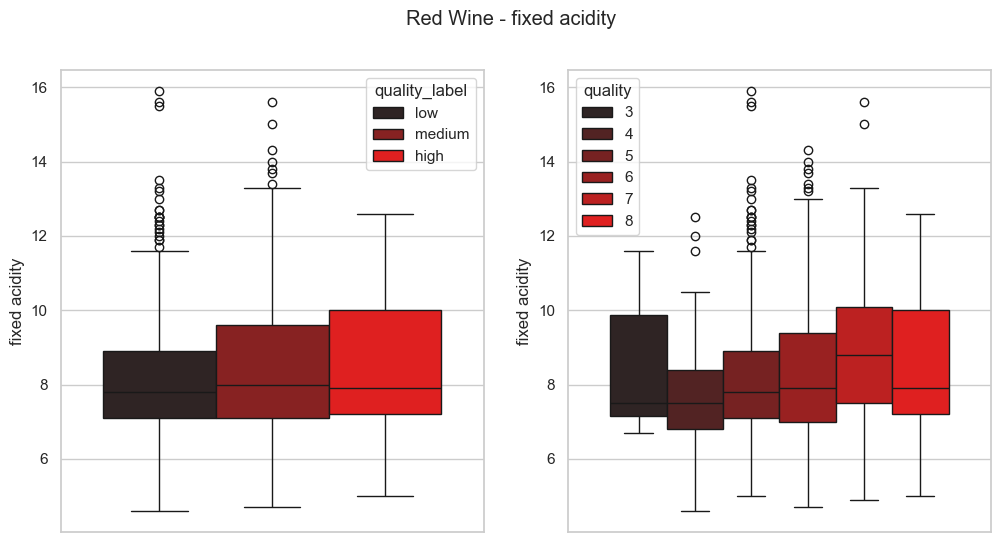

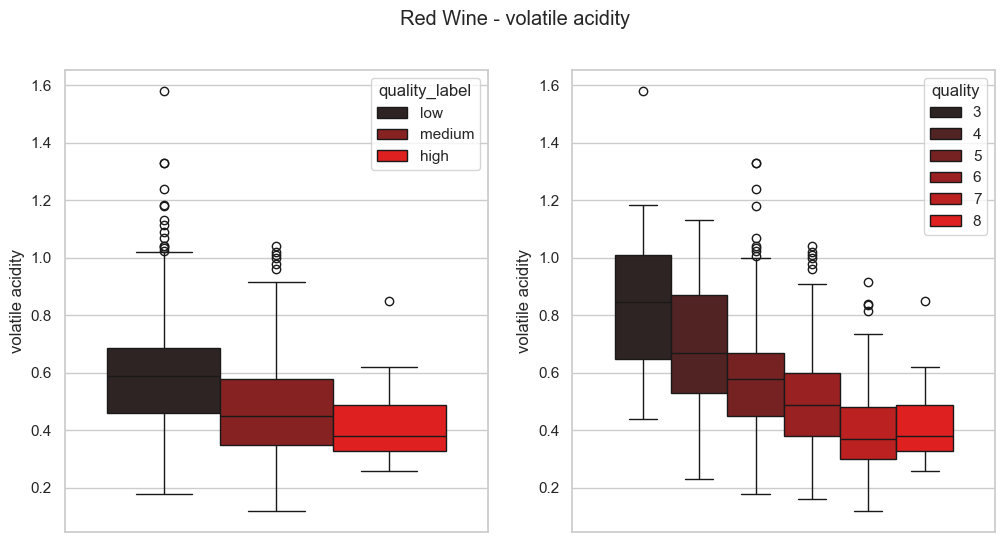

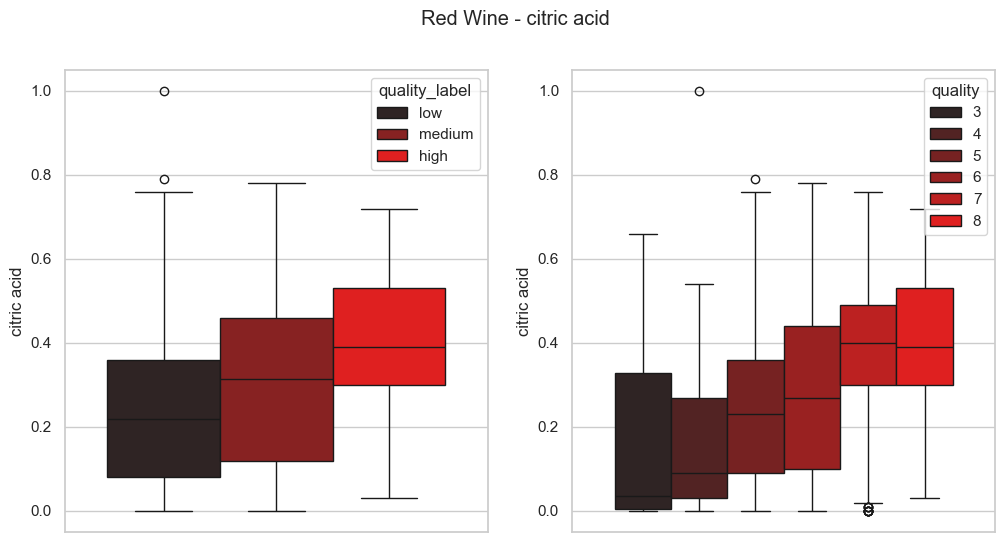

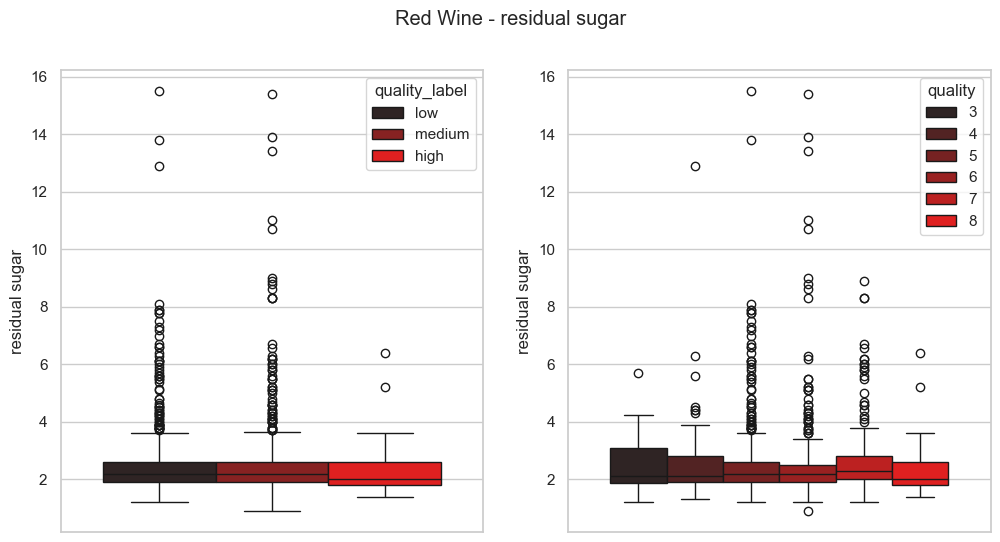

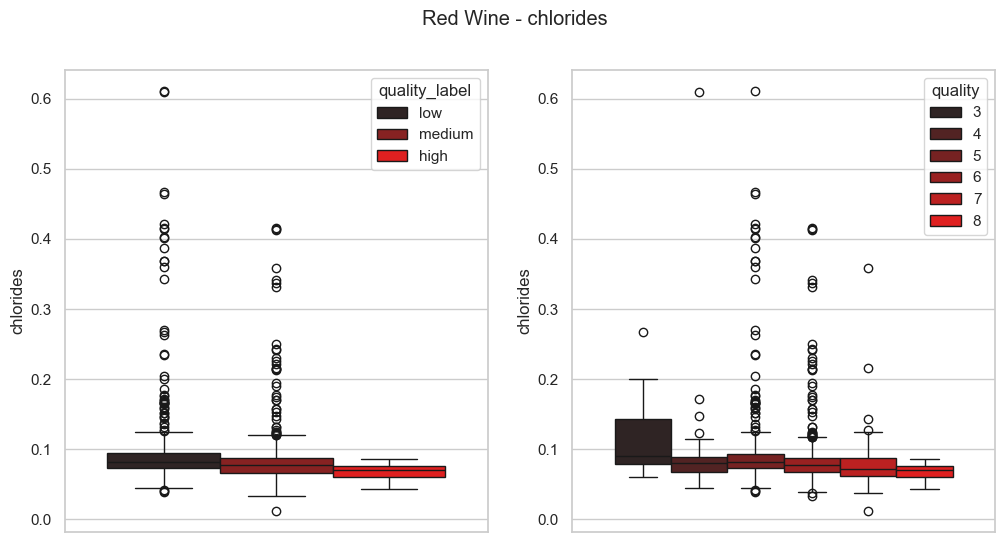

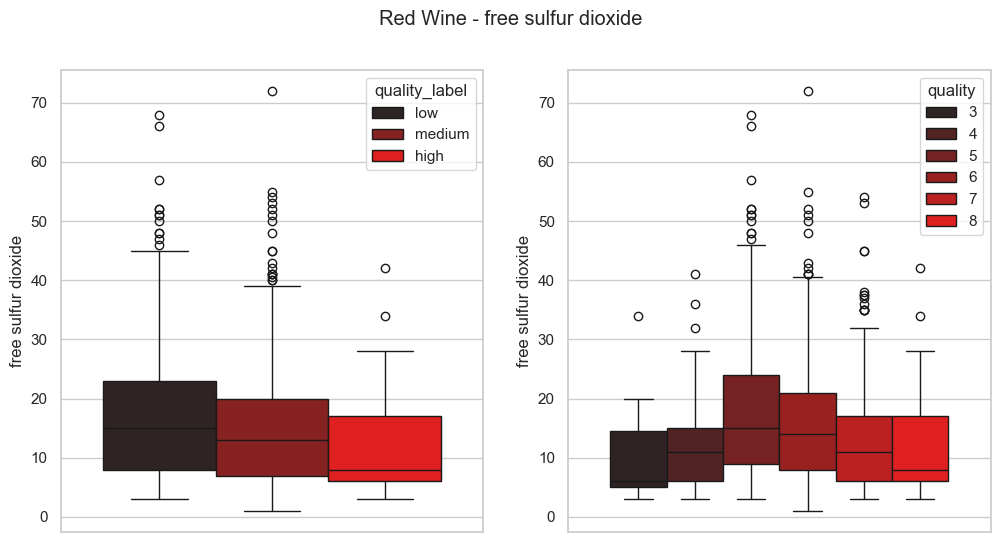

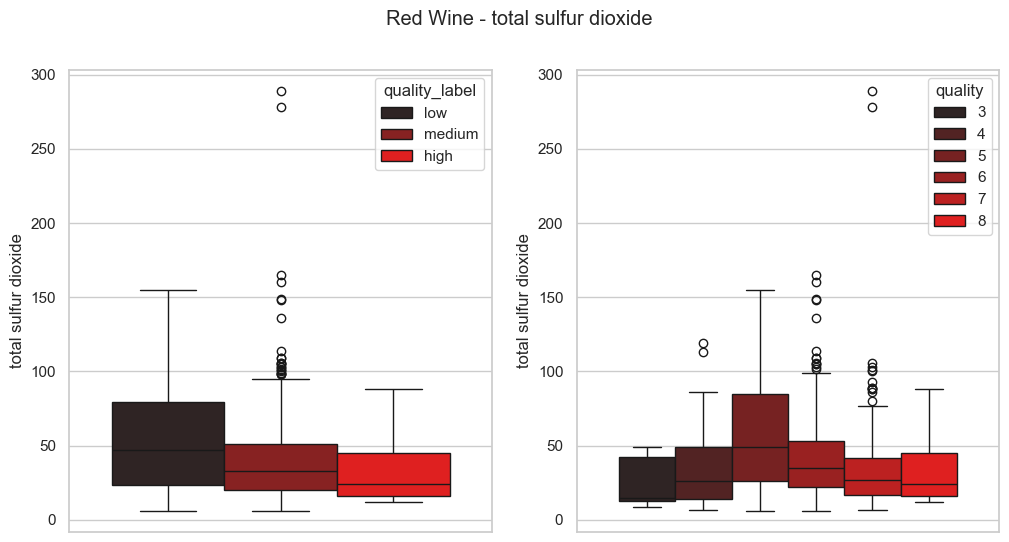

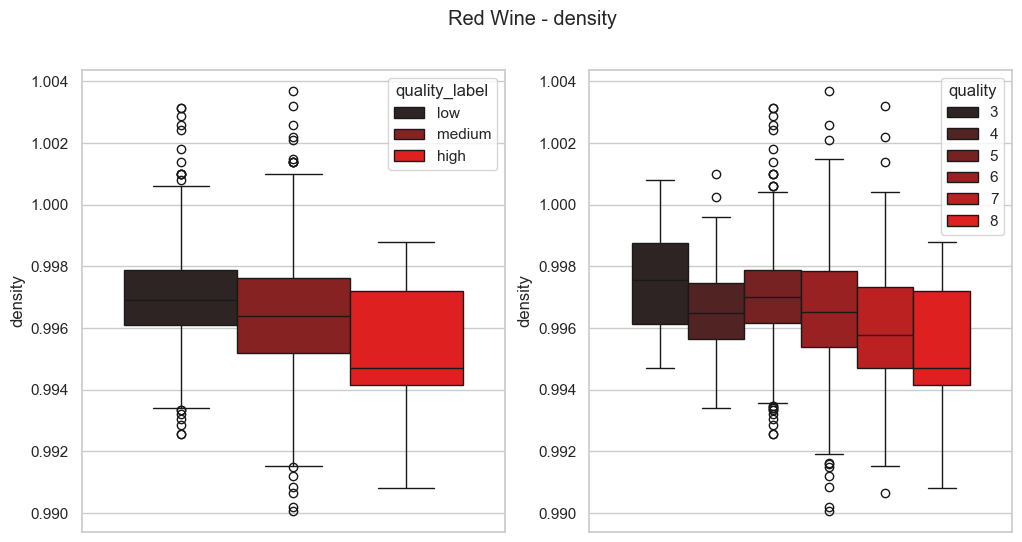

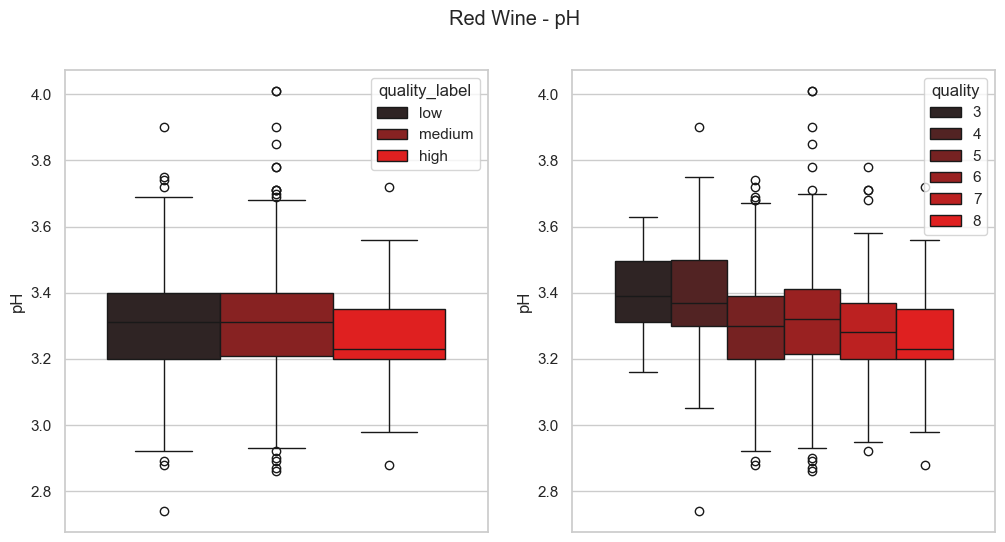

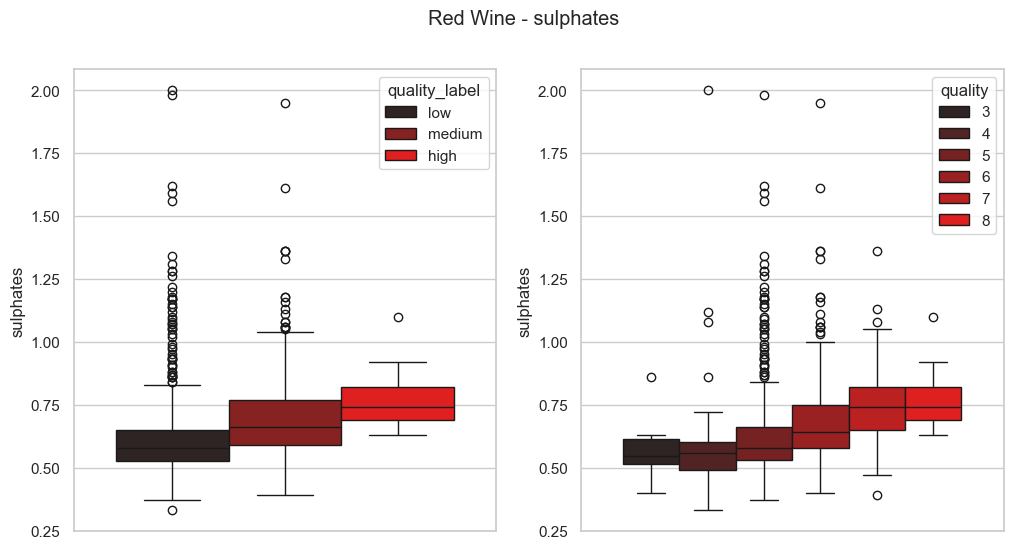

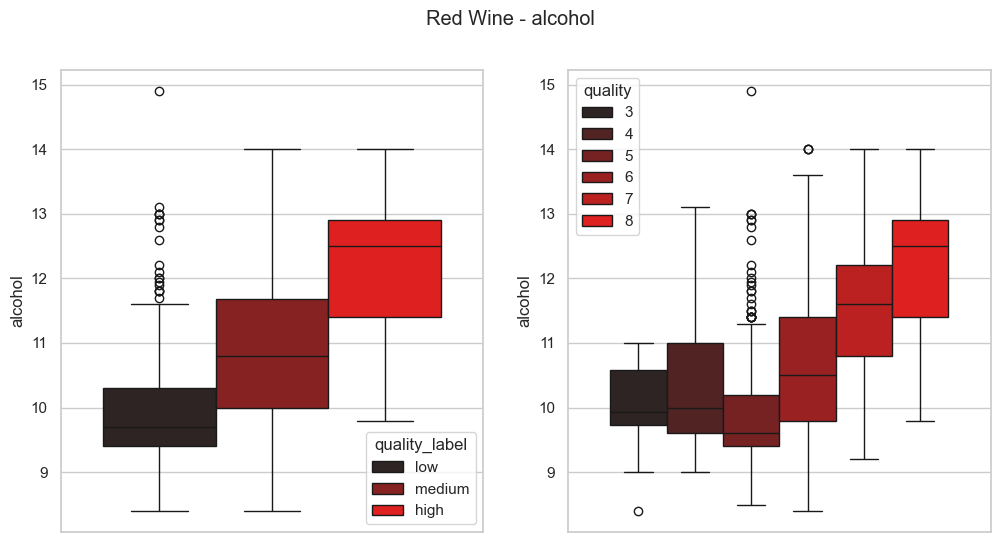

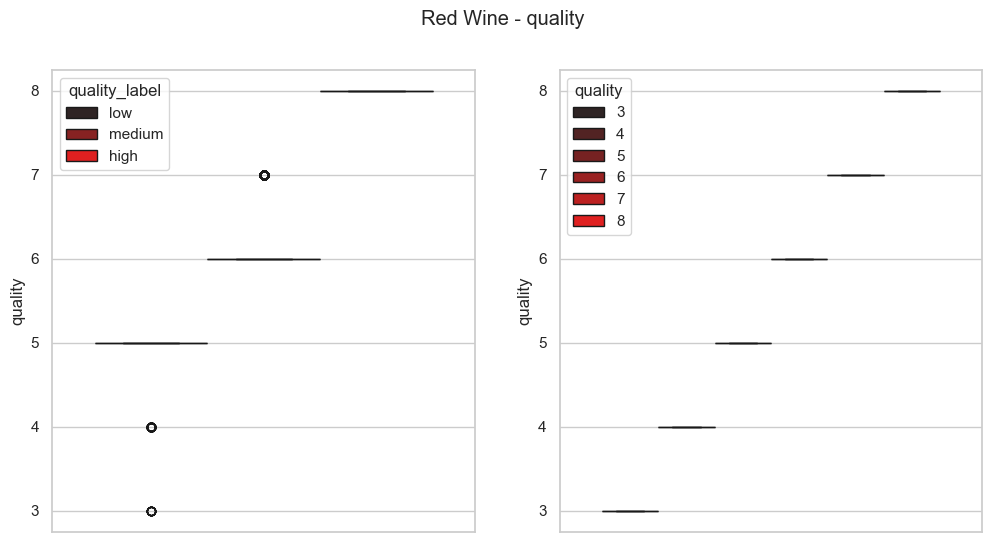

In [ ]:
# loop through the parameters
for parameter in white_wine.describe().columns:

    # set the style of seaborn
    sns.set(style="whitegrid")

    # create a figure with two side-by-side boxplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.boxplot(data=red_wine, y=parameter, hue='quality_label', palette='dark:red', ax=axes[0])
    sns.boxplot(data=red_wine, y=parameter, hue='quality', palette='dark:red', ax=axes[1])

    # set the title
    plt.suptitle(f'Red Wine - {parameter}')

    # show the plot
    plt.show()

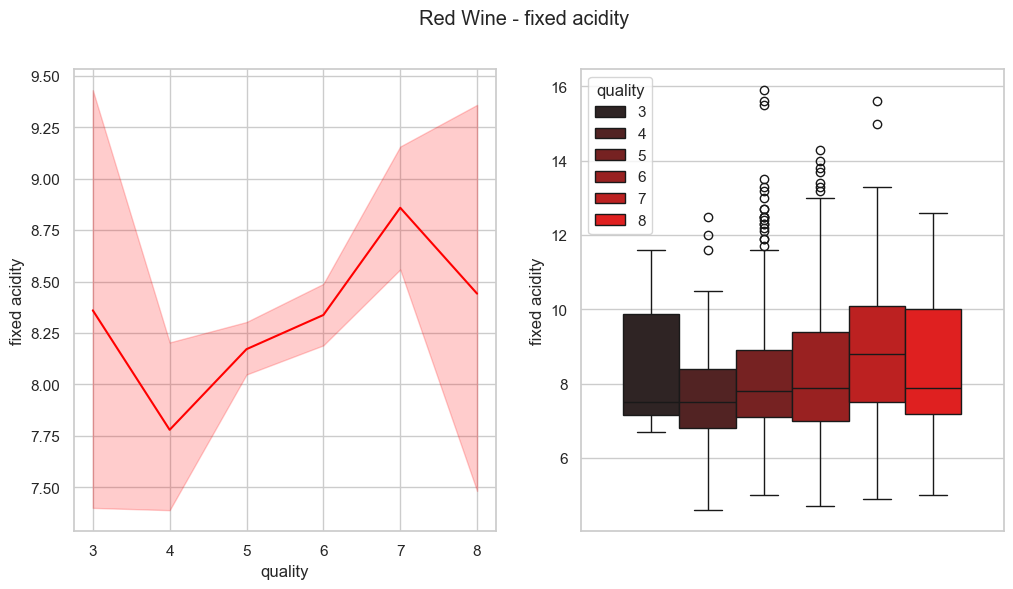

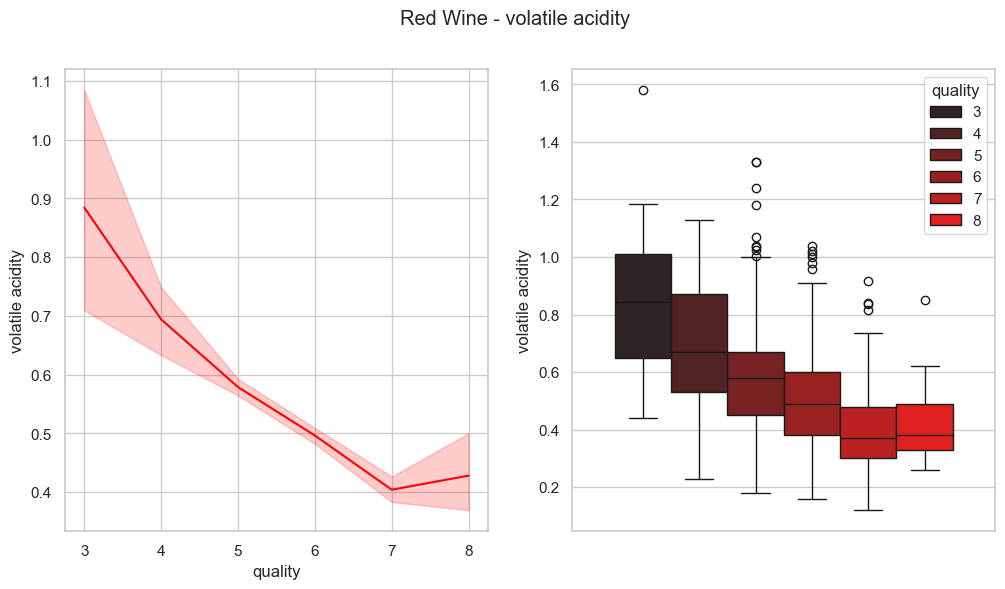

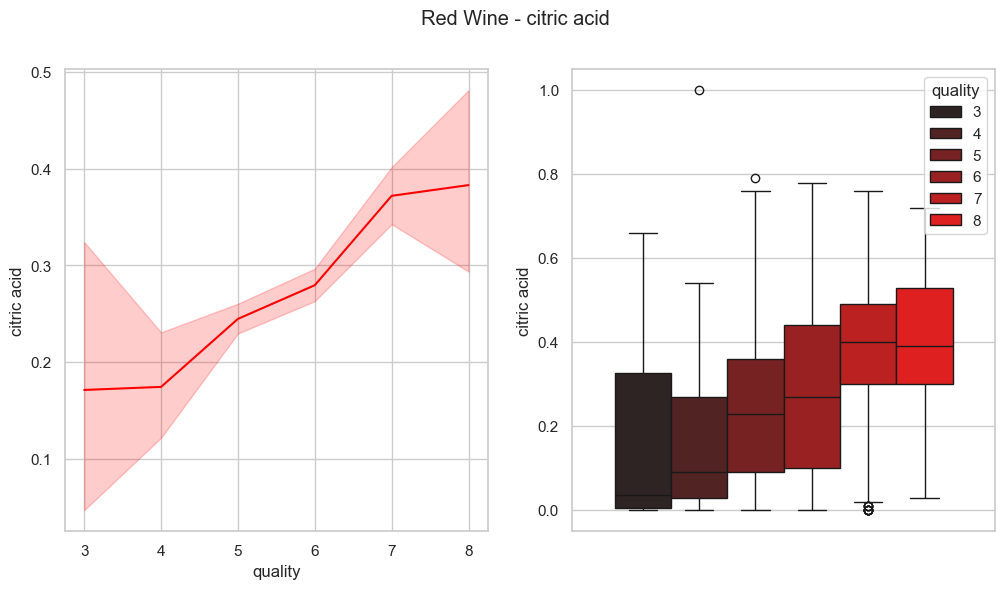

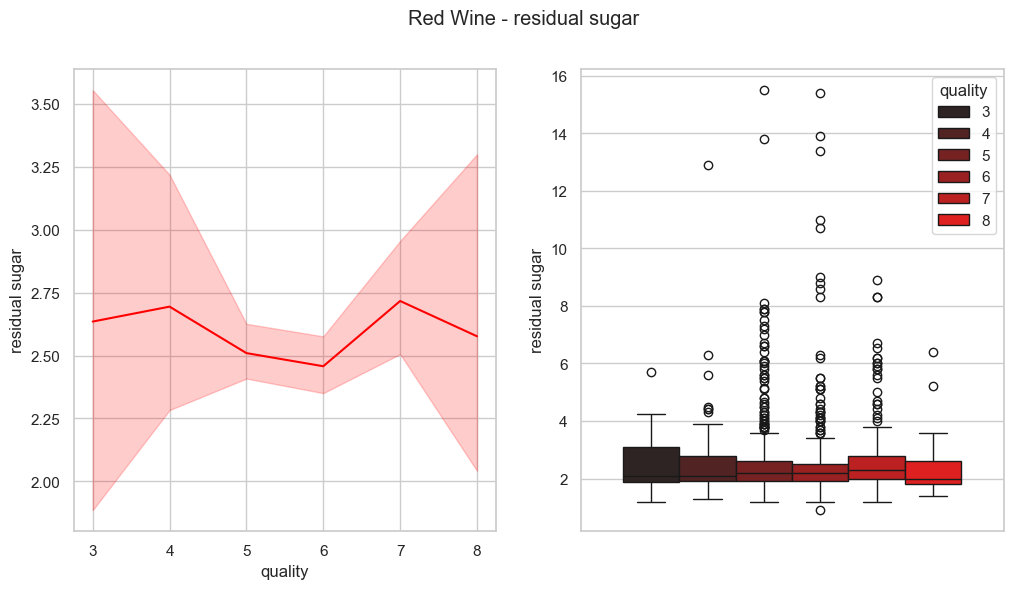

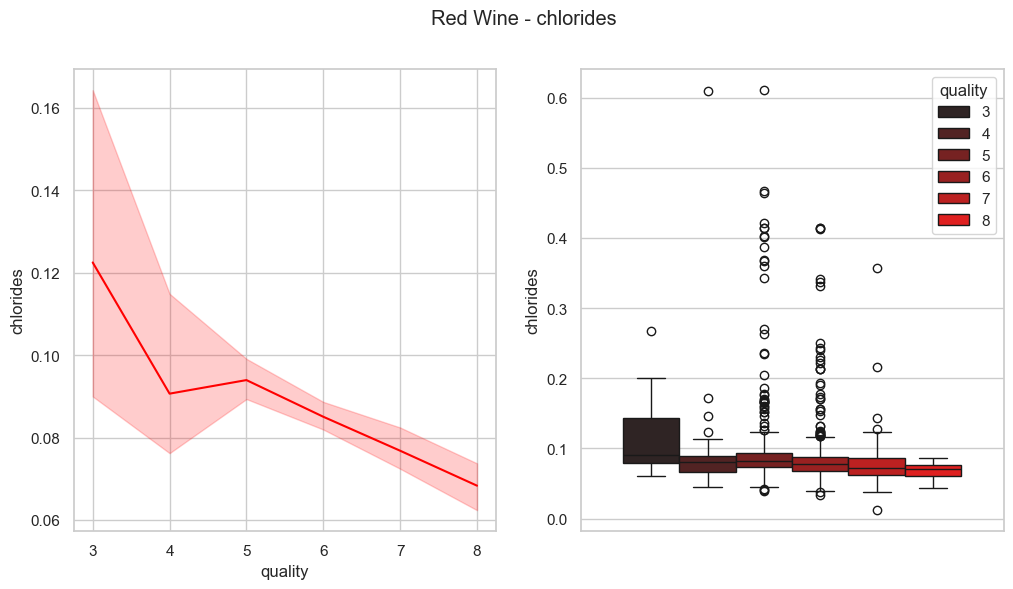

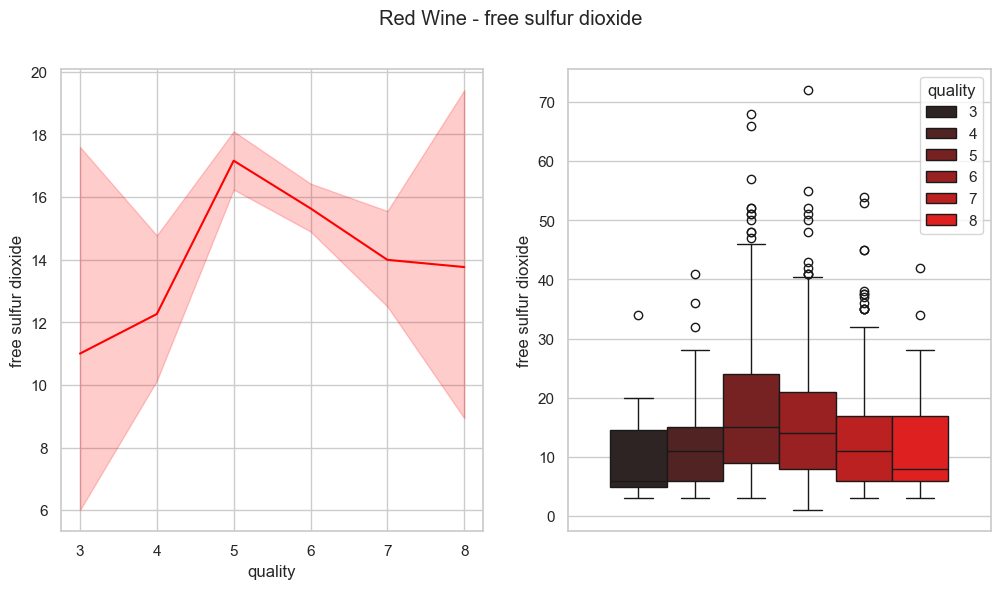

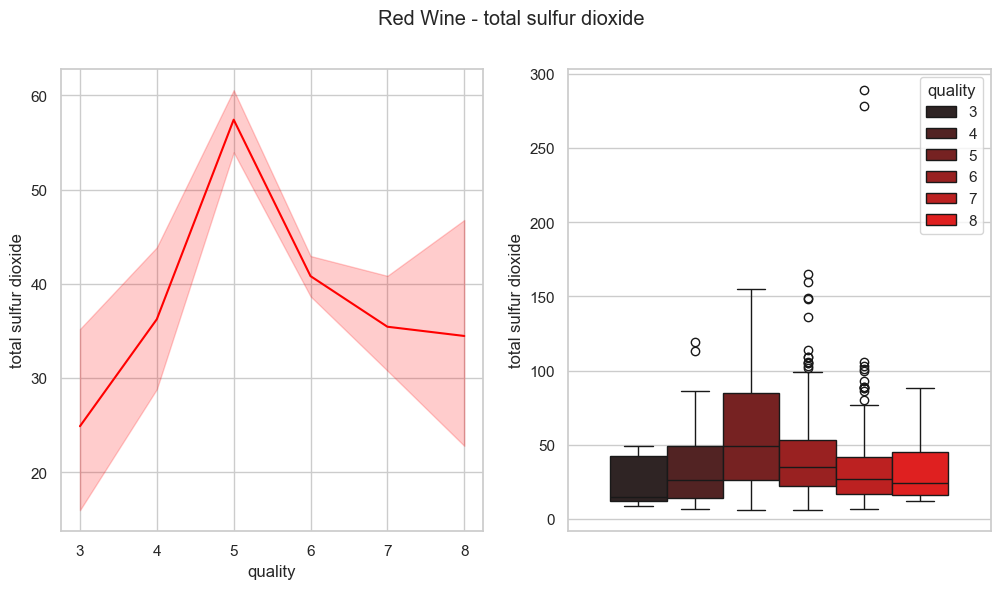

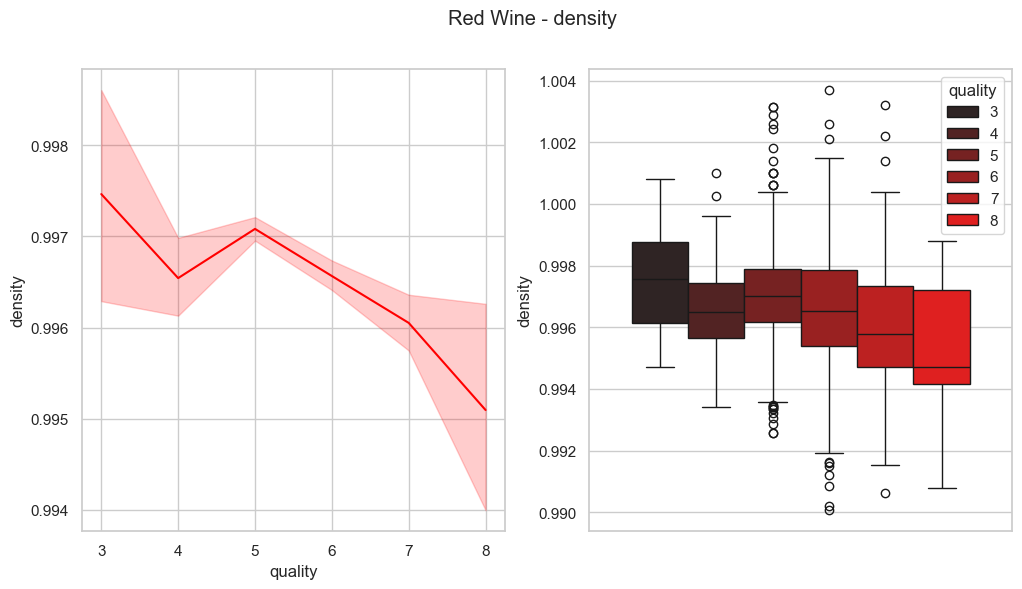

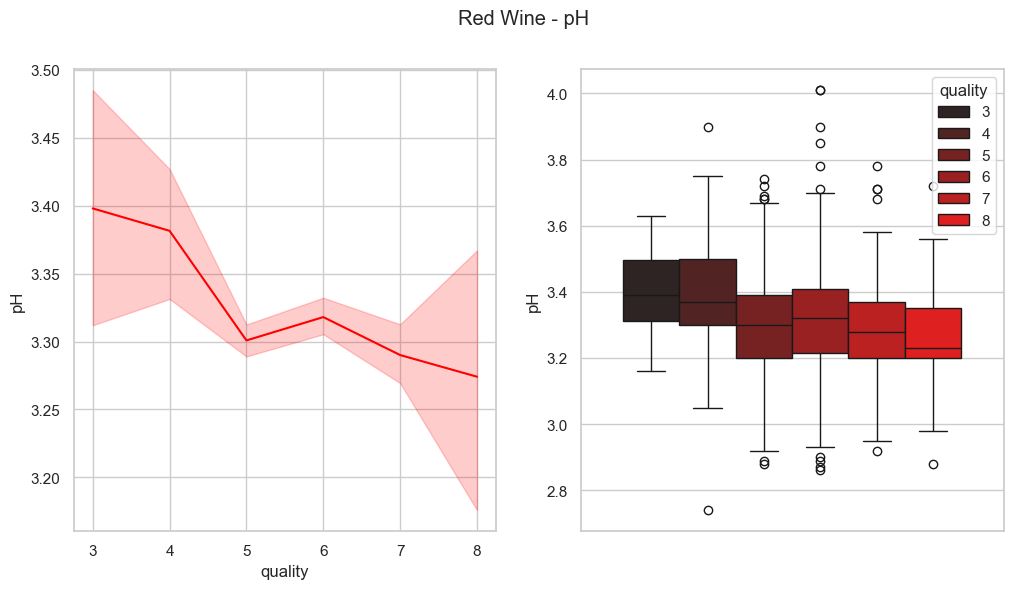

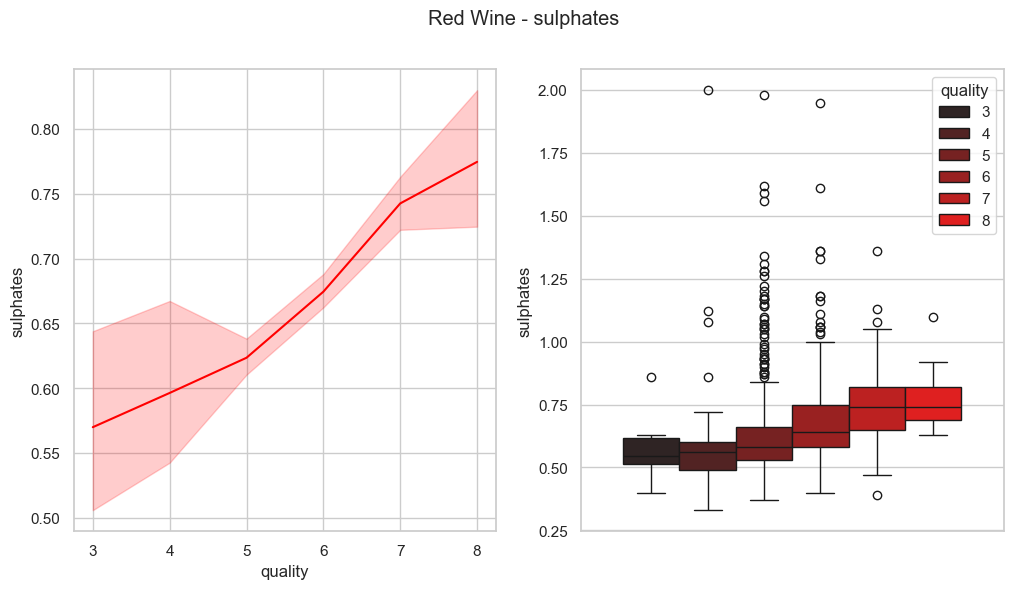

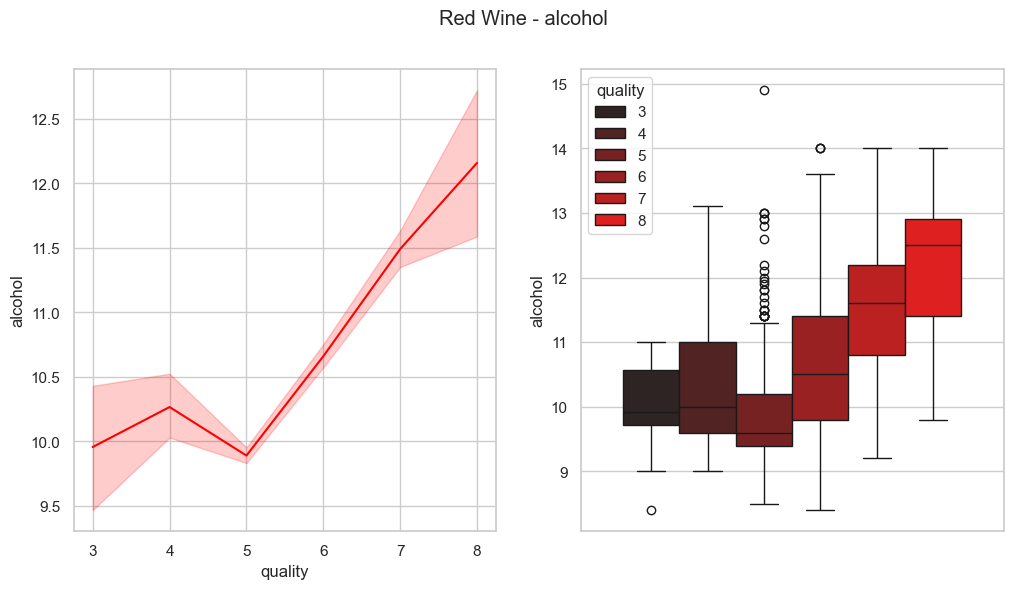

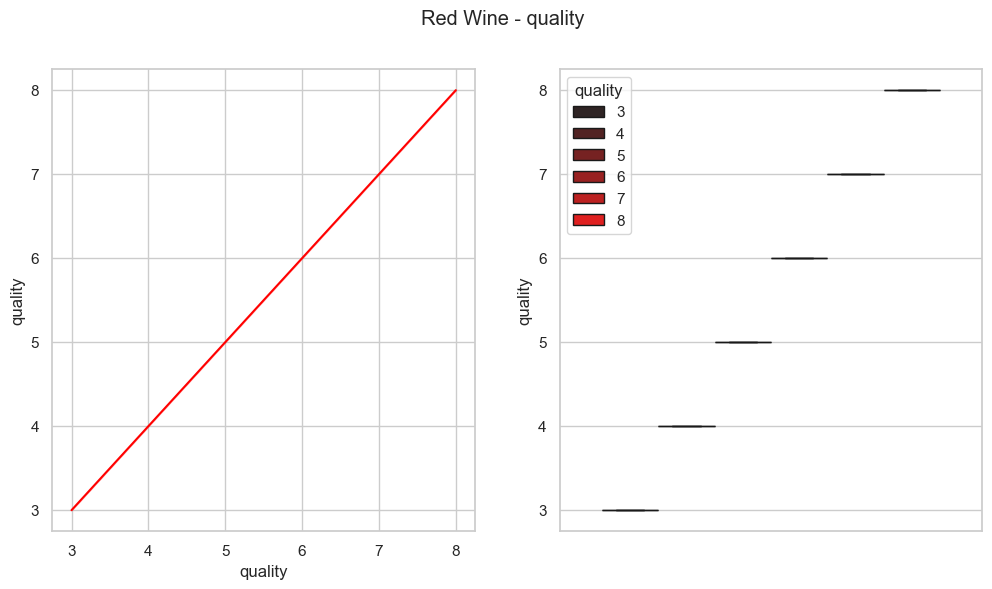

In [ ]:
# loop through the parameters
for parameter in white_wine.describe().columns:

    # set the style of seaborn
    sns.set(style="whitegrid")

    # create a figure with two side-by-side boxplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.lineplot(data=red_wine, y=parameter, x='quality', color='red', ax=axes[0])
    sns.boxplot(data=red_wine, y=parameter, hue='quality', palette='dark:red', ax=axes[1])

    # set the title
    plt.suptitle(f'Red Wine - {parameter}')

    # show the plot
    plt.show()

## What is the average chemical composition of a good wine?

In [ ]:
chemical_components = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# RED

red_wine[red_wine['quality_label'] == 'high'][chemical_components].median()

fixed acidity            7.90000
volatile acidity         0.38000
citric acid              0.39000
residual sugar           2.00000
chlorides                0.07100
free sulfur dioxide      8.00000
total sulfur dioxide    24.00000
density                  0.99472
pH                       3.23000
sulphates                0.74000
alcohol                 12.50000
dtype: float64

In [ ]:
# WHITE

white_wine[white_wine['quality_label'] == 'high'][chemical_components].median()

fixed acidity             6.75000
volatile acidity          0.28000
citric acid               0.32500
residual sugar            4.20000
chlorides                 0.03500
free sulfur dioxide      34.00000
total sulfur dioxide    119.00000
density                   0.99123
pH                        3.25000
sulphates                 0.47000
alcohol                  12.20000
dtype: float64